# **Milestone 2 Phase 1**

## **Introduction**

Nama: Luthfi Fadhlillah 
<br>
Batch: FTDS 009

---

## Dataset Description

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Sumber Dataset: https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset

## Objective

Tujuan dari milestone ini adalah untuk memenuhi assignment yang diberikan pada FTDS Phase 1 Batch 009 dan juga mengklasifikasikan apakah pelanggan di e-commerce akan mendatangkan pendapatan atau tidak, secara sederhana proyek ini akan membuat `model classification` untuk memprediksi apakah pelanggan akan berbelanja atau tidak setelah mengunjungi website e-commerce.

# Import Libraries

Melakukan import libraries yang akan digunakan dalam pengerjaan Milestone 2.

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__
pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

# Data Loading

Melakukan load dataset yang akan digunakan.

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.shape

(12330, 18)

Dataset ini terdiri dari 12330 baris dan 18 kolom, dimana terdapat juga numerical fitur dan categorical fitur dalam datasets.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Beberapa kolom ada yang skewed seperti `Administrative_Duration` , `Informational_Duration` dan yang lainnya, hal ini dapat dilihat dari nilai mean dan median yang sangat jauh. Saya akan melakukan plot untuk melihat skewness dari fitur fitur yang ada nantinya.

In [8]:
df.select_dtypes(bool).describe().T

,count,unique,top,freq
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


In [9]:
df.select_dtypes(object).describe().T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


Beberapa fitur kategorikal memiliki kardinalitas rendah, sementara dataset juga memiliki fitur dengan kardinalitas sedang (sekitar > 5 dianggap sedang jika saya membandingkannya dengan fitur lain yang memiliki unique value mulai dari 2 hingga 3).

# Data Cleaning

### Missing Values

In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak terdapat missing values dalam dataset yng akan digunakan.

### Duplicate Values

In [11]:
df.duplicated().any()

True

In [12]:
df.duplicated().sum()

125

In [13]:
df[df.duplicated(keep='last')]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
252,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,False,False
286,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,False,False
11205,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,8,13,9,20,Other,False,False
11581,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,8,13,9,20,Other,False,False
11801,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False


In [14]:
df[df.duplicated(keep='first')]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


Dataset memiliki duplicate rows sebanyak 125. Saya akan mendrop duplicate rows yang terdapat dalam dataset ini.

In [15]:
df.drop_duplicates(keep='first', inplace = True)

In [16]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [17]:
df.duplicated().any()

False

Dataset sudah tidak mengandung duplicate rows lagi dan saat ini dataset memiliki 12205 baris dan 18 kolom.

# Data Exploration (EDA)

## Numerical Features

In [18]:
num_cols = df.select_dtypes("number").columns.tolist()
len(num_cols)

14

Kita memiliki 14 kolom numerik, saya akan mengecek distribusi dan menemukan beberapa insight menarik dalam data exploration dibwah ini:

**Mengecek distribusi numerikal fitur**

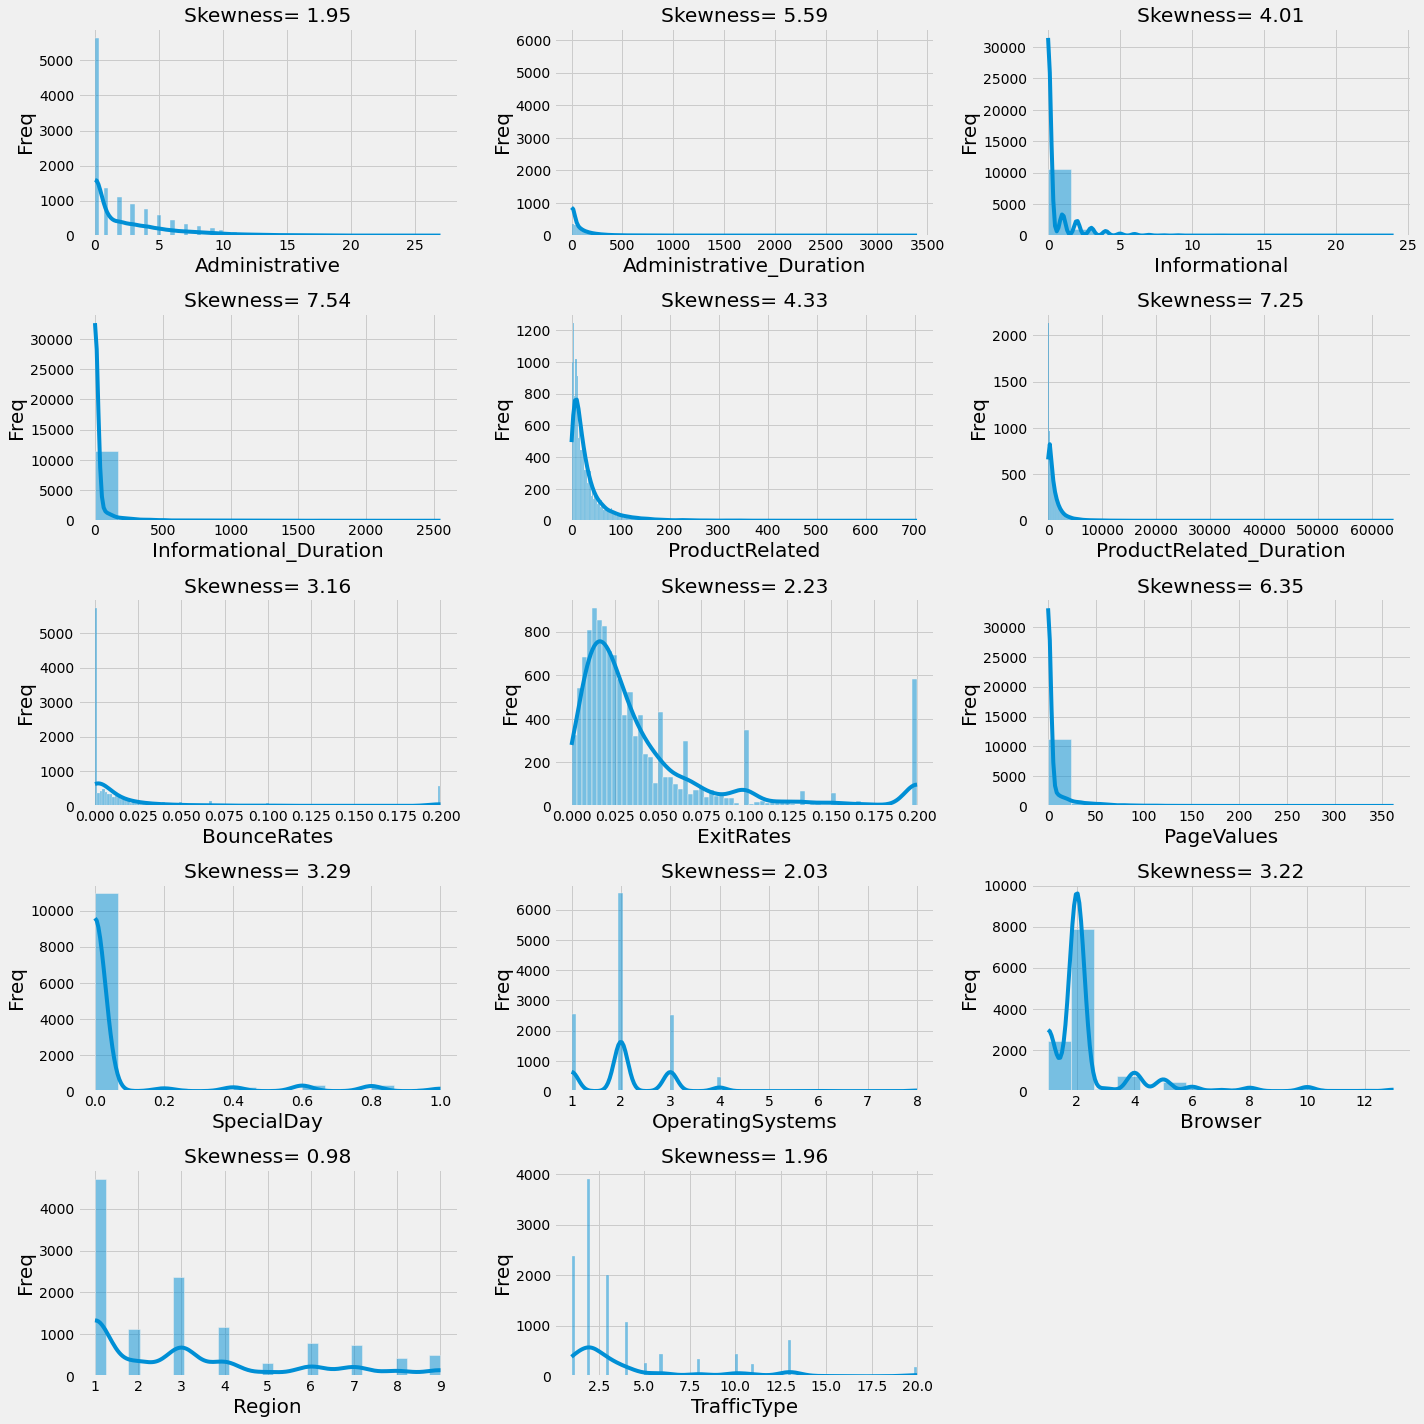

In [19]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

Berdasarkan histogram di atas, kita dapat melihat bahawa semua fitur skewed, ini artinya fitur fitur tersebut memiliki outlier. Penanganan outlier akan dilakukan untuk menghasilkan model yang  lebih baik. 

Skewed tersebut mungkin disebabkan oleh customer yang menghabiskan waktu lama saat browsing, apakah mereka akhirnya membeli atau tidak. Sedangkan untuk kolom lainnya, dikarenakan popularitas beberapa software seperti Opearting System dan browser.

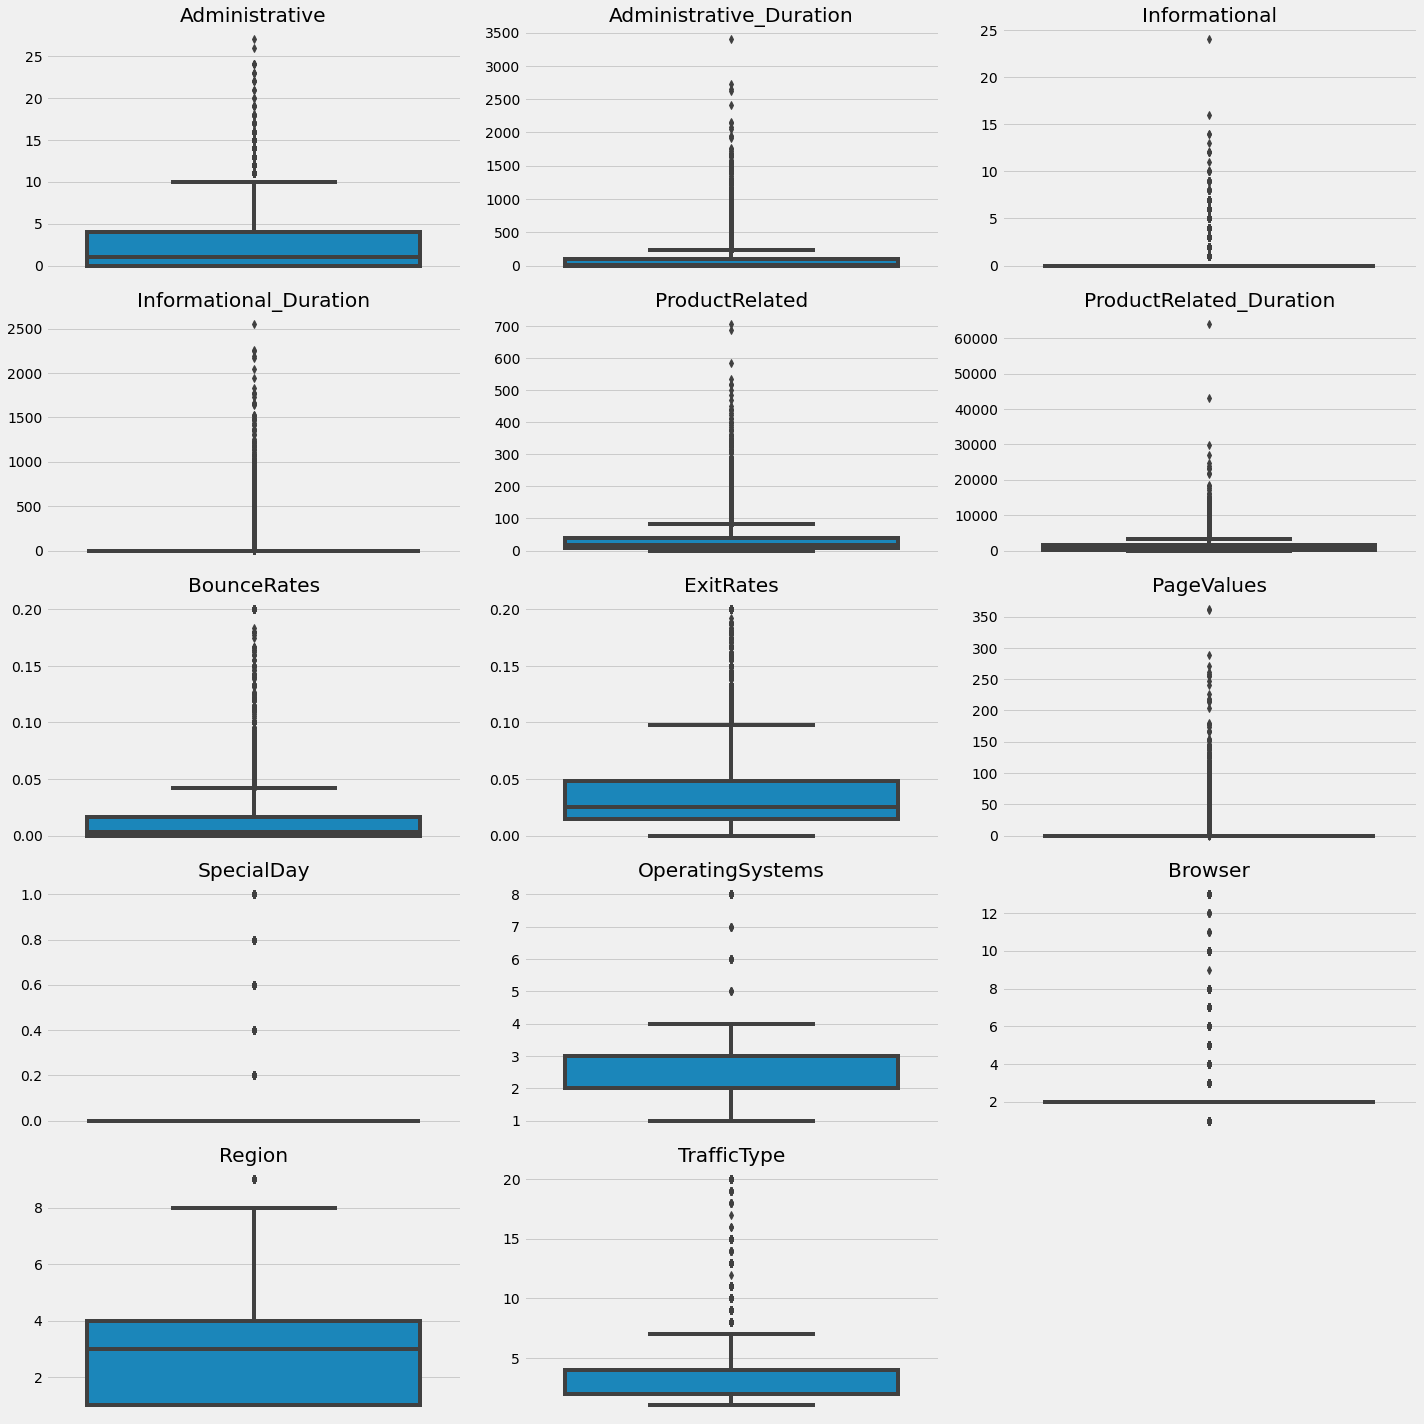

In [20]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df[num_cols[i]]
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Dengan menggunakan boxplot, kita bisa melihat outlier lebih jelas daripada histogram. Ini akan bermanfaat dalam mengevaluasi setelah handling outlier.

- SpecialDay tidak mengandung banyak outlier, sebagian besar nilainya sekitar 0,0.

**Mengecek distribusi fitur numerik dengan variabel targetnya**

In [21]:
palette = {True : '#FF5F00', False : '#B4ECE3'}

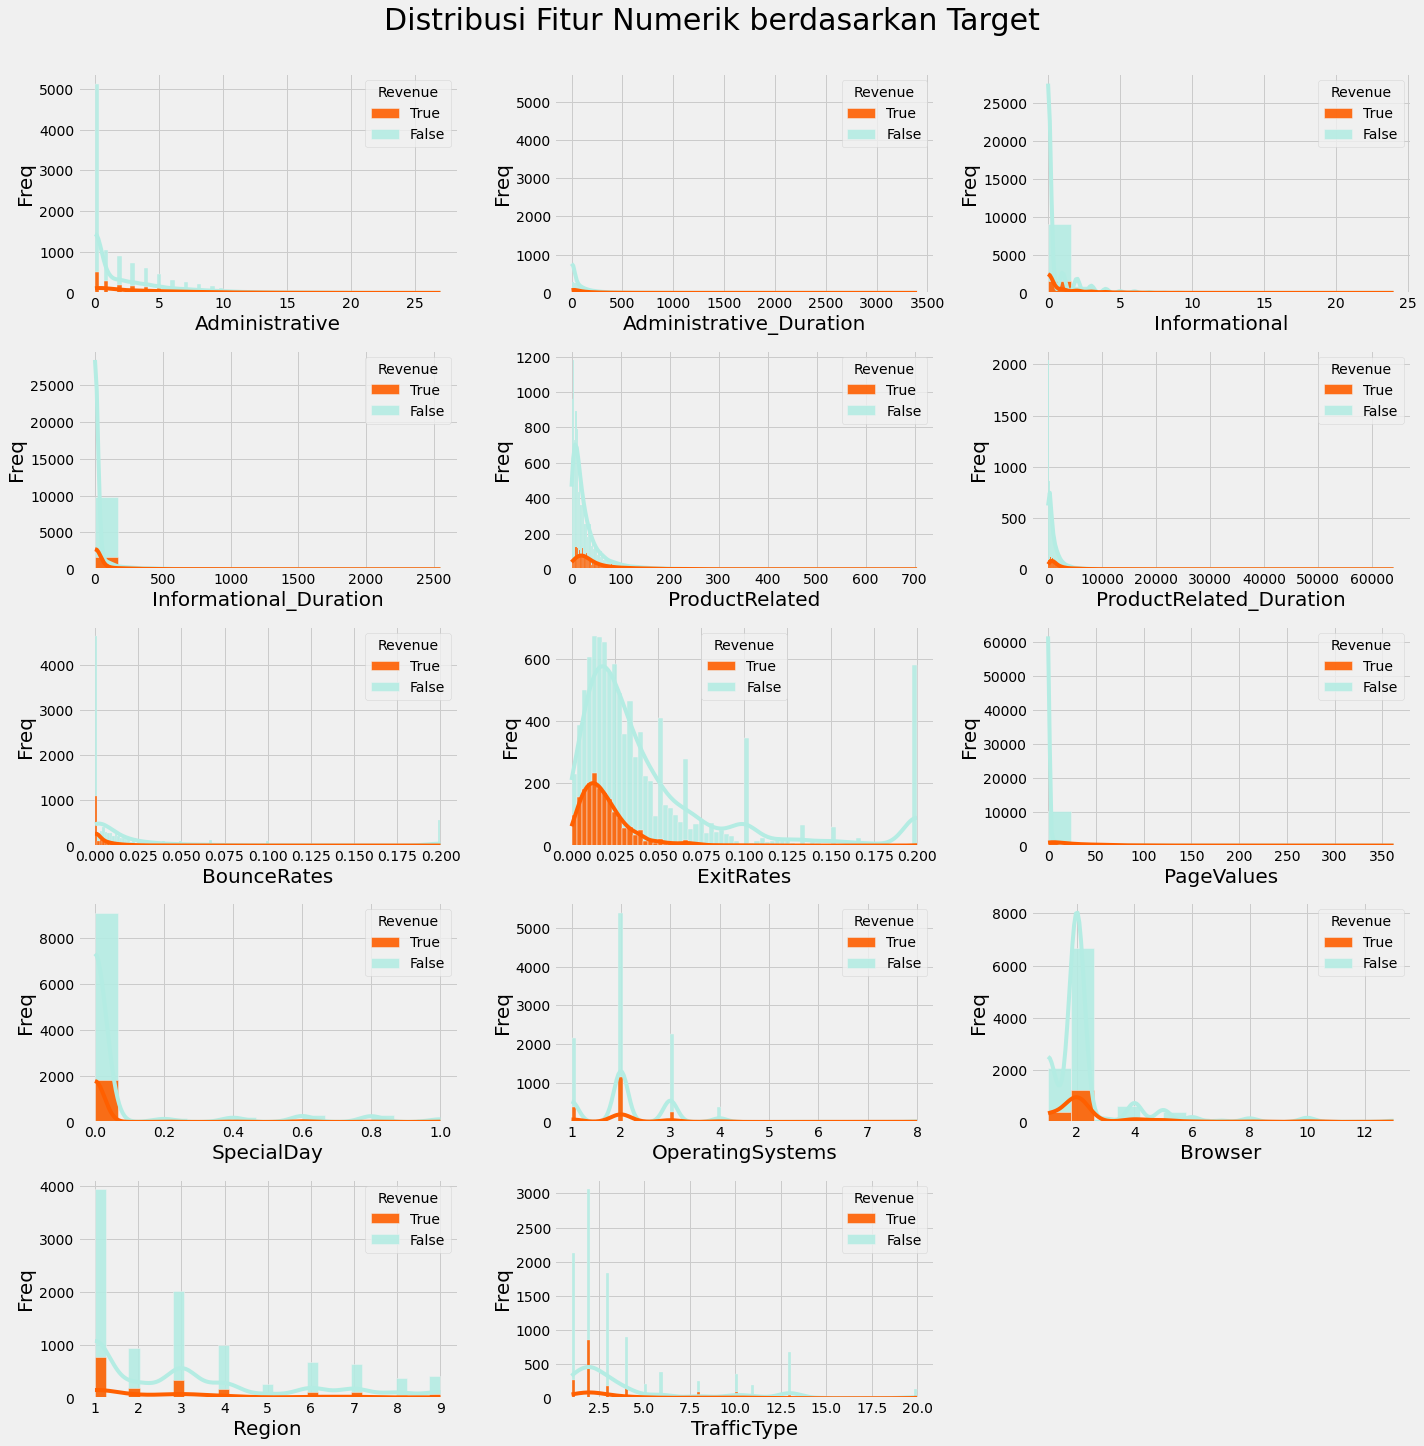

In [22]:
plt.figure(figsize=(20, 20))
plt.suptitle('Distribusi Fitur Numerik berdasarkan Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        x = df[num_cols[i]],
        kde = True,
        hue = df['Revenue'],
        hue_order = [True, False],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()

Jika kita melihat distribusi antara mereka yang akhirnya membeli dan mereka yang pergi begitu saja tanpa membeli, hampir semua distribusi pada setiap kolom terlihat serupa. Mari kita lihat lebih dekat boxplotnya.

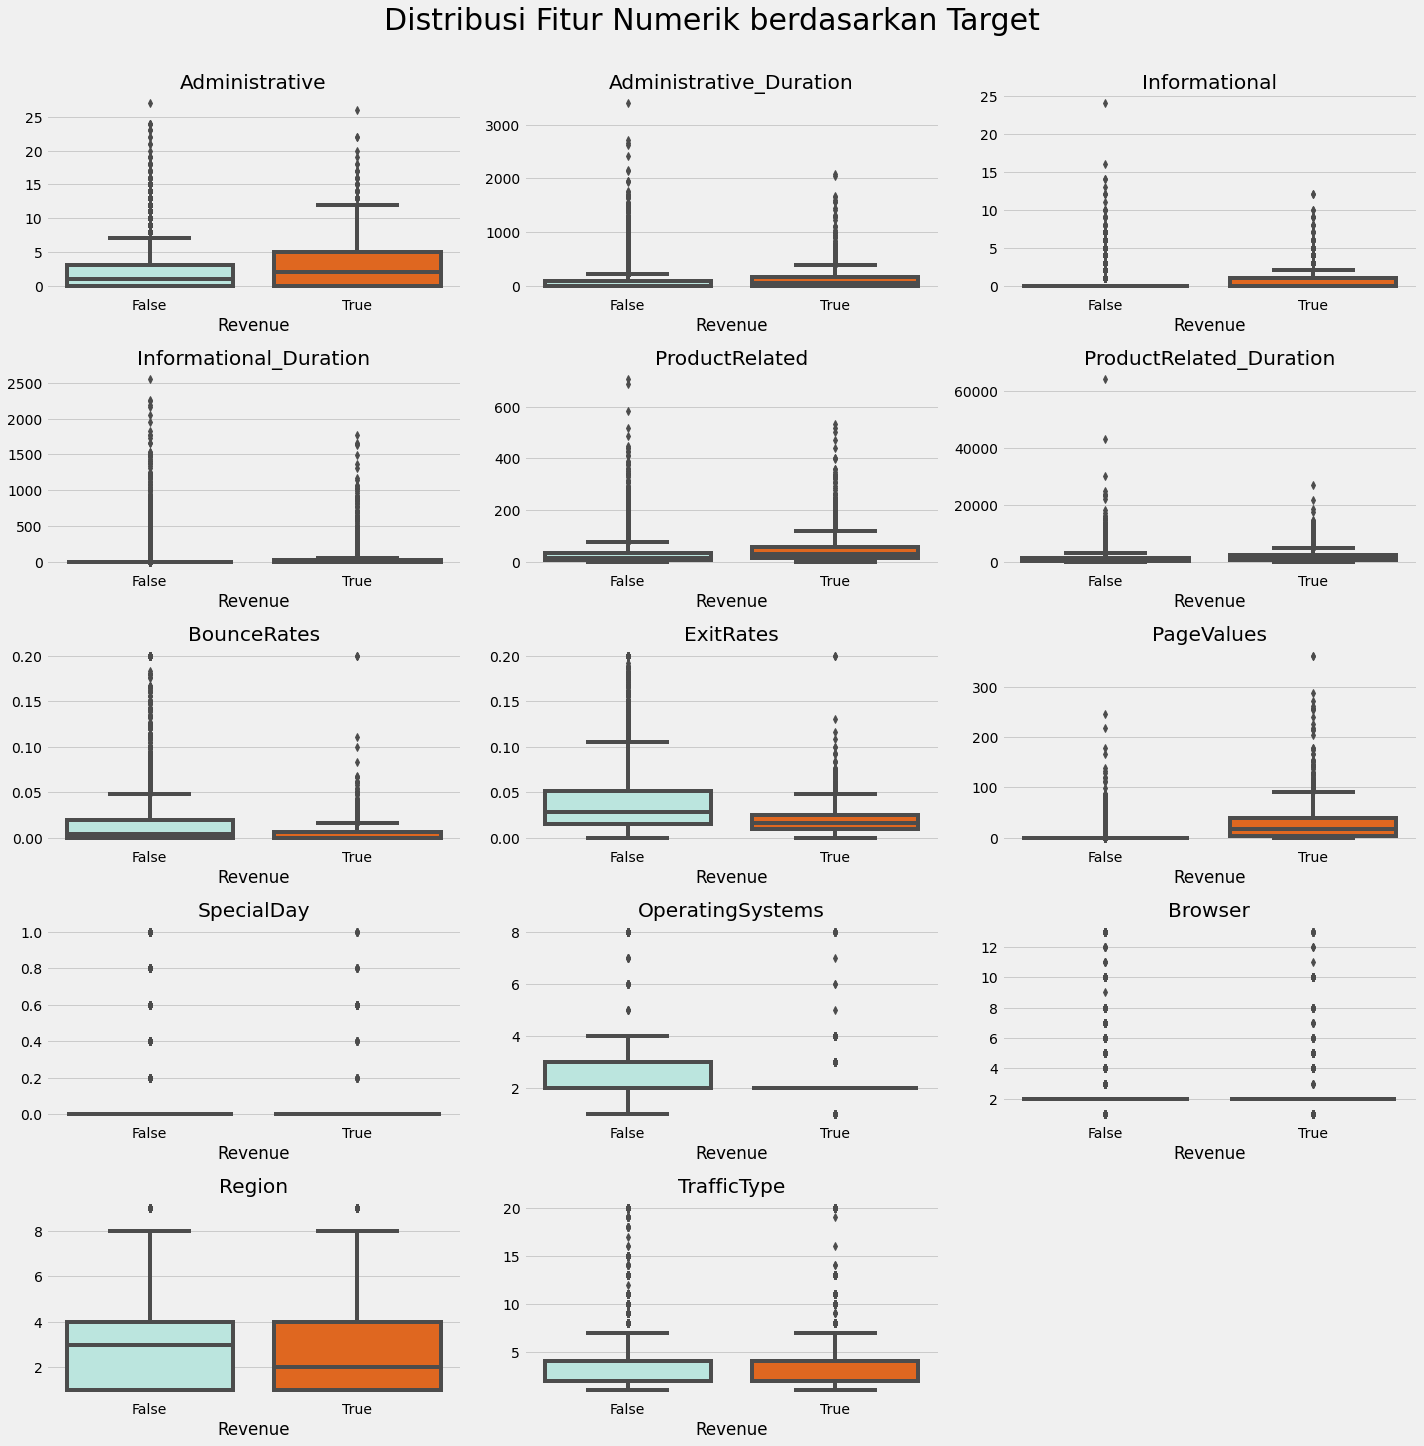

In [23]:
plt.figure(figsize=(20, 20))
plt.suptitle('Distribusi Fitur Numerik berdasarkan Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df[num_cols[i]],
        x = df['Revenue'],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Mayoritas pelanggan yang akhirnya membeli memiliki median yang lebih besar pada Administrative, Informational, ProductRelated, dan PageValues.

Mereka juga memiliki median yang lebih kecil di ExitRates, Region.

Ada beberapa nilai yang dapat menjadi representasi dari variabel nominal, yaitu OperatingSystems, Browser, Region, dan TrafficType. 

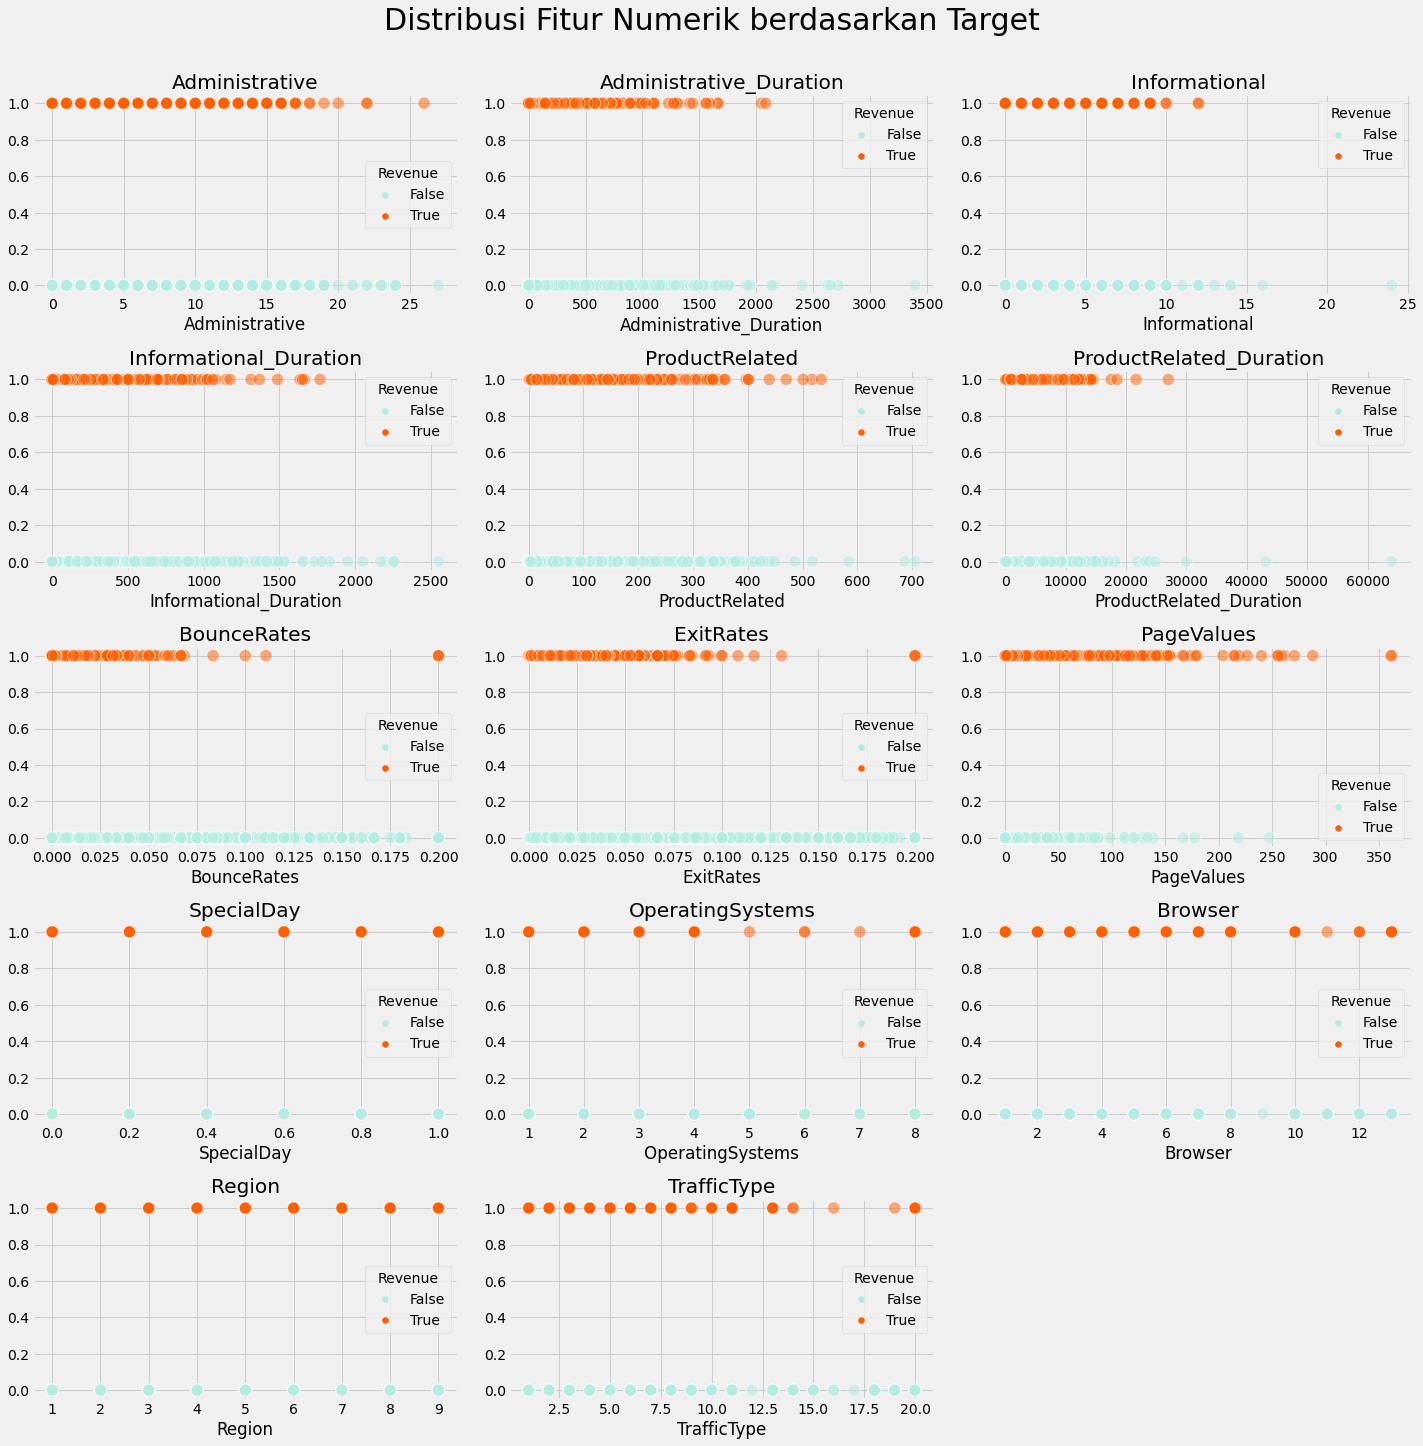

In [24]:
plt.figure(figsize=(20, 20))
plt.suptitle('Distribusi Fitur Numerik berdasarkan Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.scatterplot(
        x = df[num_cols[i]],
        y = df['Revenue'], hue = df['Revenue'],
        palette = palette, s = 150, alpha = 0.5
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Hubungan antara kolom dan variabel target juga dapat dilihat pada plot di atas. Ini memiliki kesimpulan yang sama dengan plot sebelumnya tetapi outlier dan batas nilai mayoritas tampak lebih jelas.
- Mayoritas yang tidak membeli, memiliki total BounceRate dan ExitRate yang lebih besar. Mereka yang tidak membeli, memiliki BounceRate mulai dari 0 hingga 0,2. Sedangkan yang akhirnya membeli berkisar antara 0 hingga 0,06.
- Mayoritas yang akhirnya membeli, memiliki total PageValues yang lebih besar. Mereka yang akhirnya membeli, memiliki PageValues mulai dari 0 hingga 175. Sedangkan yang tidak akhirnya membeli berkisar antara 0 hingga 90.

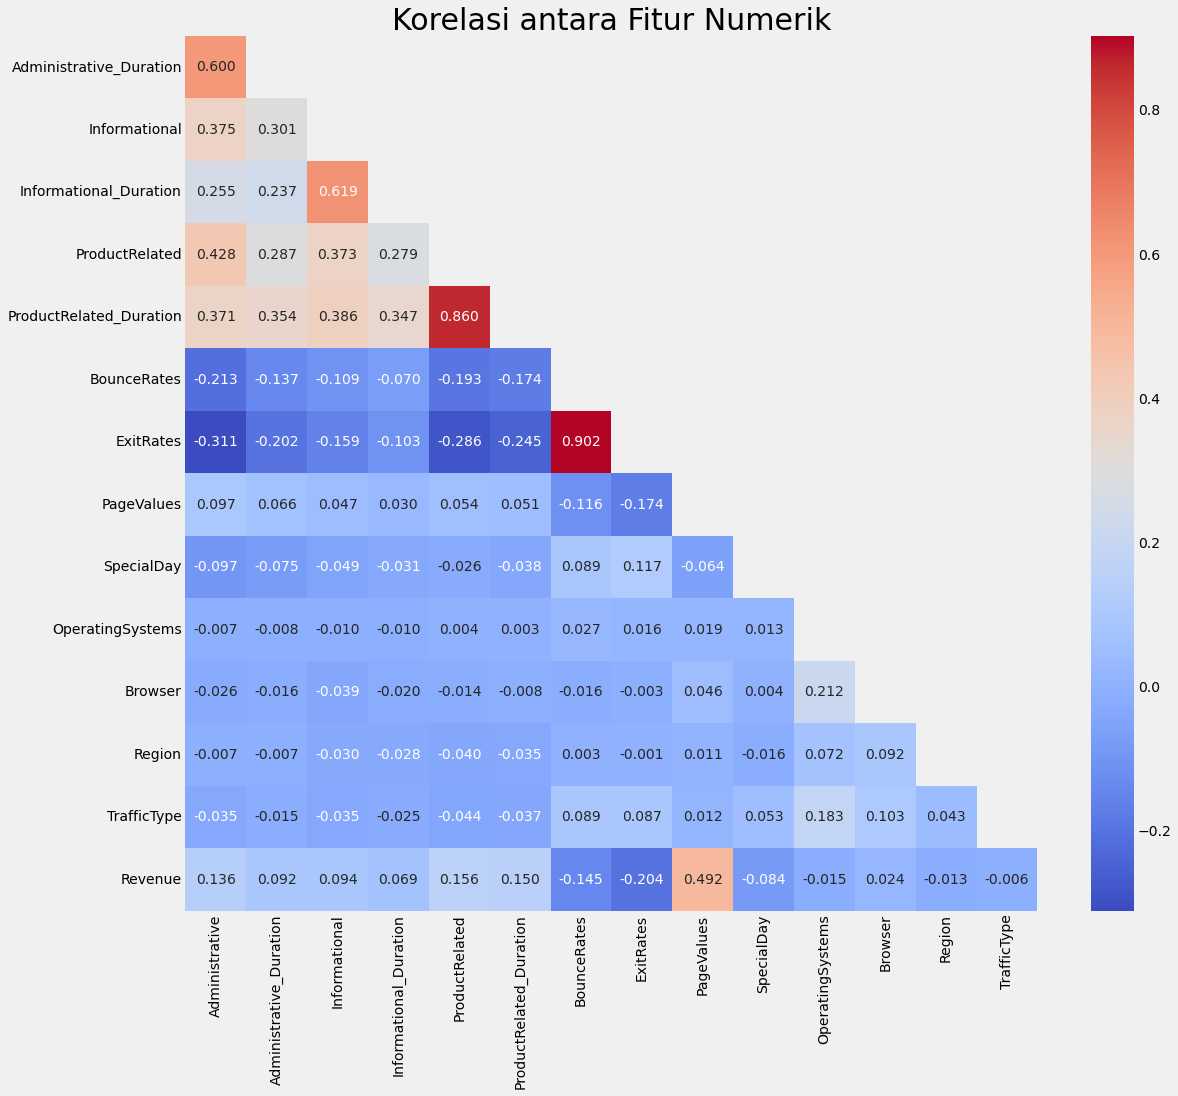

In [25]:
df_corr = df.copy()
df_corr['Revenue'] = np.where(df_corr['Revenue'] == True, 1, 0)

corr_ = df_corr[num_cols + ["Revenue"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns=['Revenue'], index = 'Administrative')

plt.figure(figsize = (17, 15))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'coolwarm',
)
plt.title("Korelasi antara Fitur Numerik",fontsize=30)
plt.yticks(rotation=0)
plt.show()

In [26]:
highly_correlated = corr_.round(decimals = 3)[corr_.round(decimals = 3)> 0.5].dropna(axis=0, how="all").dropna(axis=1, how="all")
highly_correlated

,Administrative,Informational,ProductRelated,BounceRates
Administrative_Duration,0.6,NaN,NaN,NaN
Informational_Duration,NaN,0.619,NaN,NaN
ProductRelated_Duration,NaN,NaN,0.86,NaN
ExitRates,NaN,NaN,NaN,0.902


Beberapa fitur numerik sangat berkorelasi, tetapi hanya ada satu fitur yang berkorelasi positif dan cukup tinggi dengan variabel target yaitu: PageValues. Fitur ini memiliki kecenderungan tinggi untuk menjadi salah satu fitur yang paling penting.

## Categorical Features

**Mengecek fitur kategorik**

In [27]:
cat_cols = df.drop(columns=['Revenue']).select_dtypes([object, bool]).columns.tolist()
len(cat_cols)

3

Dataset ini memiliki 3 fitur kategorik, dan salah satunya dalam format boolean.

**Distribusi Fitur Kategorik**

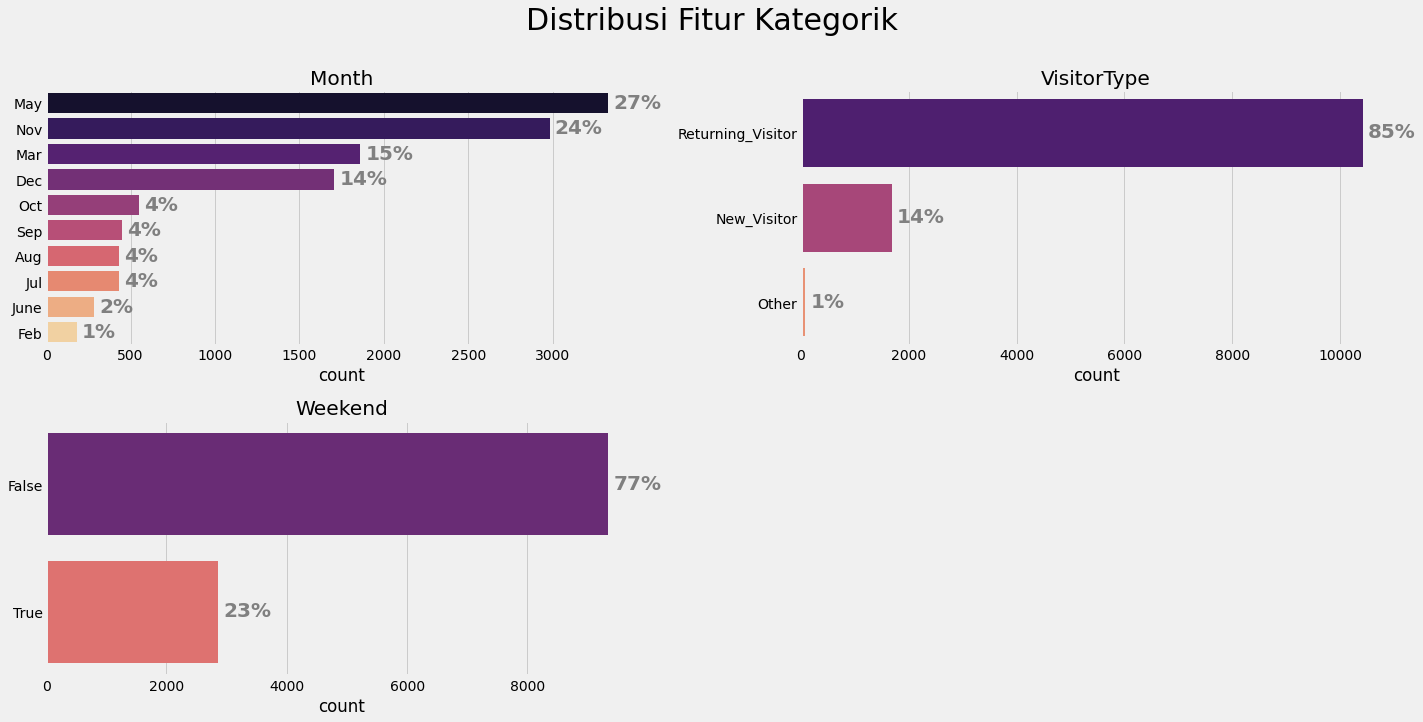

In [28]:
plt.figure(figsize=(20, 10))
plt.suptitle('Distribusi Fitur Kategorik', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_cols[i]], palette = 'magma', order = df[cat_cols[i]].value_counts().index
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=20
        )
plt.tight_layout()
plt.show()

Sebagian besar data pelanggan adalah:
- Kunjungan terbanyak terjadi pada bulan Mei sebanyak 27% dan mayoritas adalah Returning Visitor dan juga mereka tidak berkunjung pada saat weekend.

**Mengecek fitur kategorik dengan variabel target**

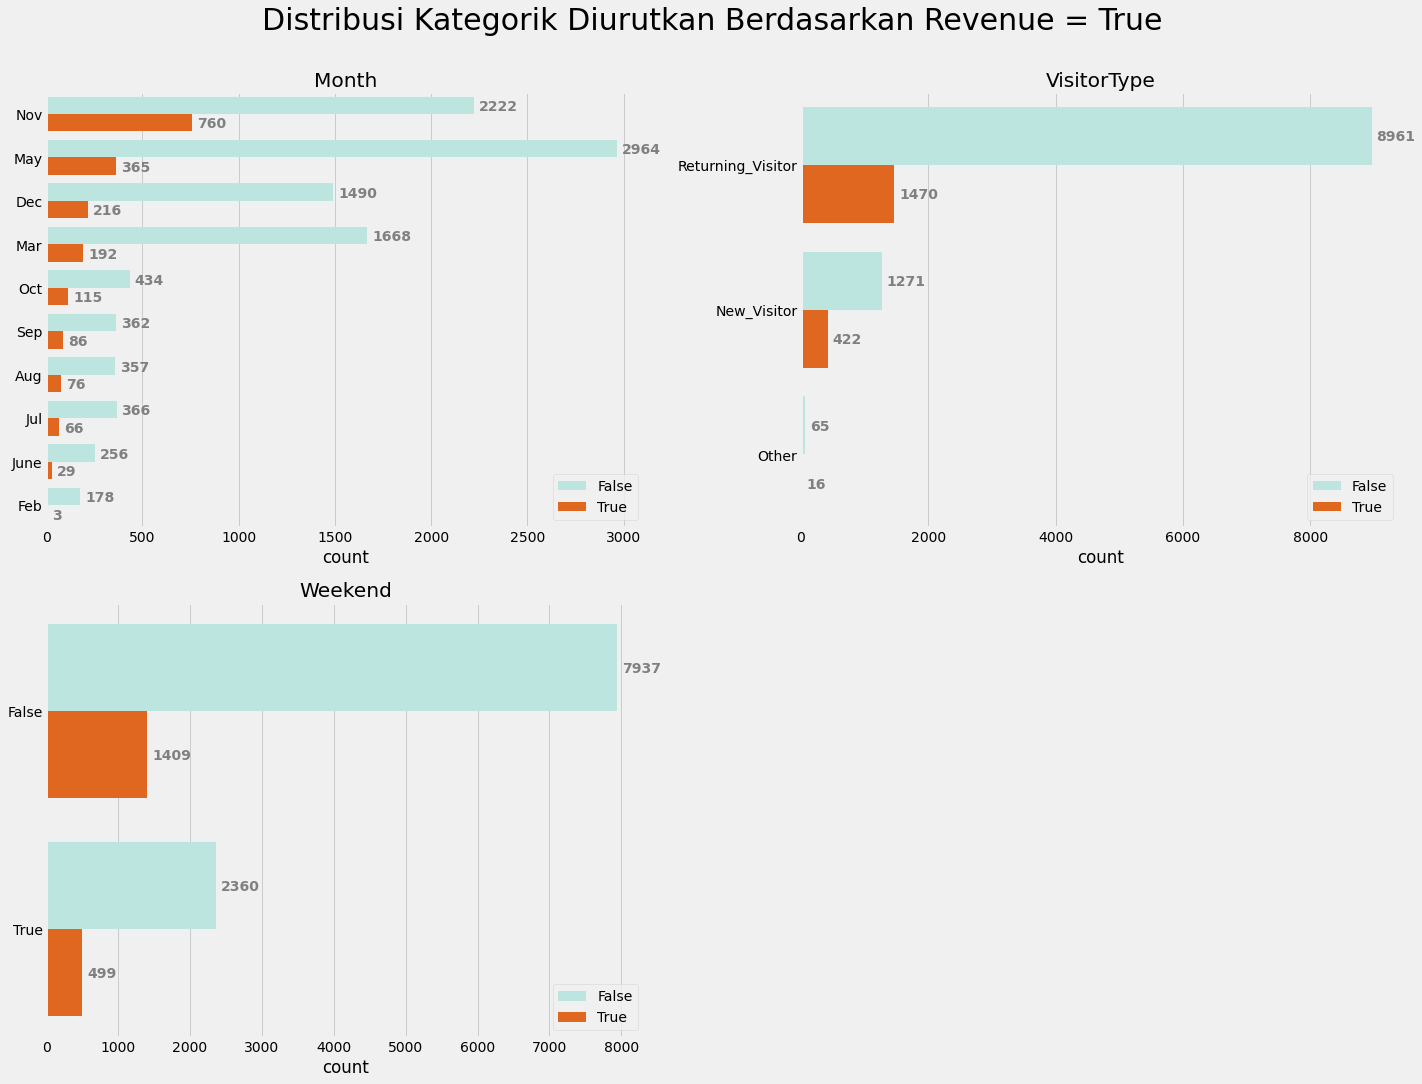

In [29]:
plt.figure(figsize=(20, 15))
plt.suptitle('Distribusi Kategorik Diurutkan Berdasarkan Revenue = True', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_cols[i]], palette = palette, order = pd.crosstab(df[cat_cols[i]], df['Revenue']).sort_values(True, ascending = False).index,
        hue = df['Revenue']
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

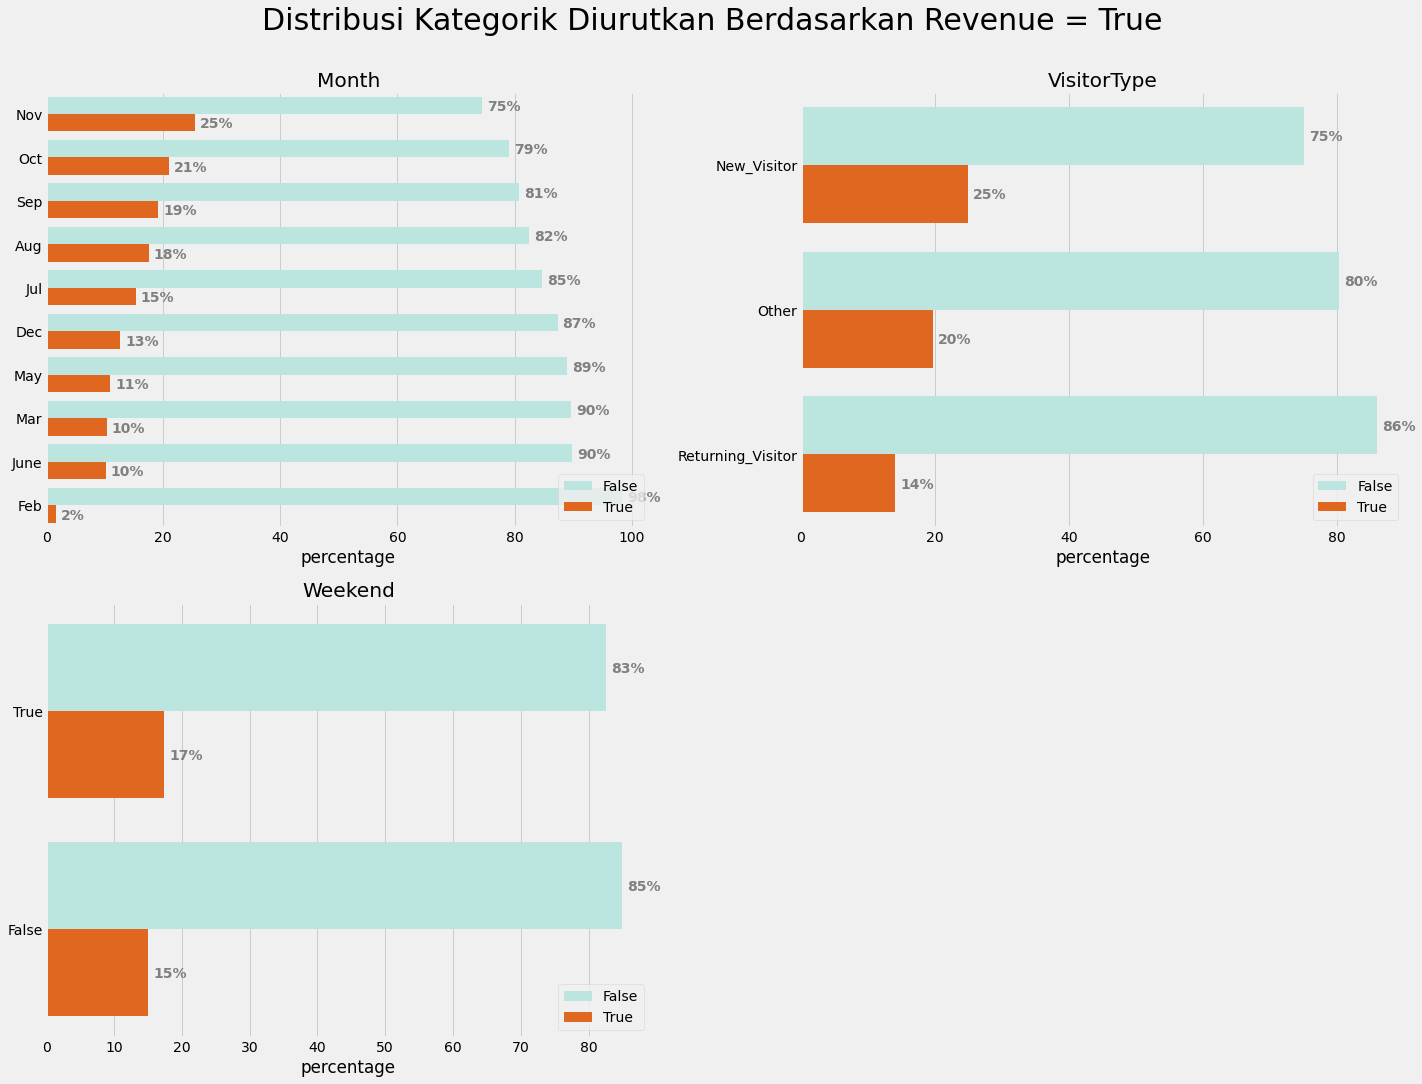

In [30]:
plt.figure(figsize=(20, 15))
plt.suptitle('Distribusi Kategorik Diurutkan Berdasarkan Revenue = True', fontsize=30, y = 1.005)
for i in range(len(cat_cols)):
    
    # create percentage df
    dist = df.groupby([str(cat_cols[i]), "Revenue"]).count()[["Administrative"]]
    cat_group = df.groupby([str(cat_cols[i])]).count()[["Administrative"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols[i]), "Revenue", "count", "percentage"]
    
    if dist.columns[0] == 'Weekend':
        dist['Weekend'] = dist['Weekend'].astype(str)
    # plot
    plt.subplot(len(cat_cols)//2+1, 2, i+1)
    ax = sns.barplot(
        x = "percentage",
        y = str(cat_cols[i]),
        data = dist,
        hue = 'Revenue',
        order = dist.iloc[dist[dist['Revenue'] == True]['percentage'].sort_values(ascending = False).index][str(cat_cols[i])],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

Mayoritas pelanggan yang akhirnya membeli adalah:
- Diamati pada bulan November dan Mei, adalah pengunjung yang kembali, dan mereka berkunjung bukan di akhir pekan.

## Target Variable

Mengecek distribusi variabel target.

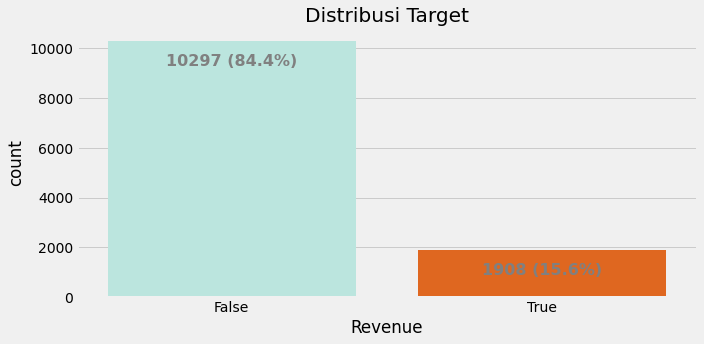

In [31]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(
    x = df["Revenue"], palette = palette
)
ax.set_title("Distribusi Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'gray'
    )
plt.tight_layout()
plt.show()

Dataset ini memiliki variabel target yang imbalance. Akan dilakukan teknik sampling agar data set menjadi lebih seimbang.

# Data Preprocessing

## Target Variable

Mengubah variabel target dari kategorikal ke format numerik.

In [32]:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [33]:
df['Revenue'] = np.where(df['Revenue'] == True, 1, 0)

In [34]:
df['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

## Feature Selection

Pemilihan fitur berdasarkan korelasi dengan prediktor lain menggunakan analisis VIF. Saya akan menghapus kolom yang memiliki korelasi dengan satu atau beberapa prediktor lainnya.

In [35]:
highly_correlated

,Administrative,Informational,ProductRelated,BounceRates
Administrative_Duration,0.6,NaN,NaN,NaN
Informational_Duration,NaN,0.619,NaN,NaN
ProductRelated_Duration,NaN,NaN,0.86,NaN
ExitRates,NaN,NaN,NaN,0.902


In [36]:
df_features = df.drop(columns=["Revenue"])

In [37]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,Administrative,2.795037
1,Administrative_Duration,2.043290
2,Informational,2.115524
3,Informational_Duration,1.778762
4,ProductRelated,6.505625
5,ProductRelated_Duration,6.012935
6,BounceRates,6.048464
7,ExitRates,8.897479
8,PageValues,1.135105
9,SpecialDay,1.120924


Meskipun ada beberapa korelasi antara prediktor, analisis VIF tidak menunjukkan skor yang signifikan (VIF > 10).

## Feature Encoding

Fitur Encoding menggunakan metode one-hot encoding dan cyclical transformation. Variabel kategorik akan diencod menggunakan OHE, sedangkan cyclical variable akan ditransformasikan menggunakan sin-cos calculation.


In [38]:
df[cat_cols].head()

,Month,VisitorType,Weekend
0,Feb,Returning_Visitor,False
1,Feb,Returning_Visitor,False
2,Feb,Returning_Visitor,False
3,Feb,Returning_Visitor,False
4,Feb,Returning_Visitor,True


Non-ordinal feature:
- VisitorType, Weekend
    - Encoded dengan OHE.
    
Cyclical feature:
- Month
    - Encoded dengan sin-cos transformation.

### Non-ordinal

In [39]:
non_ordinal_cols = [i for i in cat_cols if i not in ['Month']]

In [40]:
print(df.shape)
df.head()

(12205, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [41]:
for i in range(len(non_ordinal_cols)):
    dummies = pd.get_dummies(df[non_ordinal_cols[i]], prefix = non_ordinal_cols[i], drop_first=True)
    df = pd.concat([df, dummies], axis = 1)
    
df.drop(columns = non_ordinal_cols, inplace = True)

In [42]:
print(df.shape)
df.head()

(12205, 19)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,0,0,1,1


Encoding menggunakan one-hot encoder berakhir dengan menambahkan 3 variabel (setelah menghapus variabel sebelumnya).

### Cyclical

Untuk  fitur cyclical, saya akan melakukan encod dengan sin-cos transformation.

Referensi: <a href="http://blog.davidkaleko.com/feature-engineering-cyclical-features.html"> Cyclical Features</a>

In [43]:
df[['Month']].head()

,Month
0,Feb
1,Feb
2,Feb
3,Feb
4,Feb


In [44]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [45]:
month_mapping = {
    'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,
    'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12
}
df['Month'] = df['Month'].replace(month_mapping)

In [46]:
df['Month'].value_counts()

5     3329
11    2982
3     1860
12    1706
10     549
9      448
8      433
7      432
6      285
2      181
Name: Month, dtype: int64

In [47]:
df['Month_sin'] = np.sin(df.Month*(2.*np.pi/12))
df['Month_cos'] = np.cos(df.Month*(2.*np.pi/12))

In [48]:
df[['Month', 'Month_sin', 'Month_cos']]

,Month,Month_sin,Month_cos
0,2,8.660254e-01,0.500000
1,2,8.660254e-01,0.500000
2,2,8.660254e-01,0.500000
3,2,8.660254e-01,0.500000
4,2,8.660254e-01,0.500000
...,...,...,...
12325,12,-2.449294e-16,1.000000
12326,11,-5.000000e-01,0.866025
12327,11,-5.000000e-01,0.866025
12328,11,-5.000000e-01,0.866025


In [49]:
df.drop(columns='Month', inplace = True)

In [50]:
print(df.shape)
df.head()

(12205, 20)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Month_sin,Month_cos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0.866025,0.5
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0.866025,0.5
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0.866025,0.5
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0.866025,0.5
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,1,1,0.866025,0.5


## Handling Outliers

In [51]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Month_sin,Month_cos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0.866025,0.5
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0.866025,0.5
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0.866025,0.5
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0.866025,0.5
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,1,1,0.866025,0.5


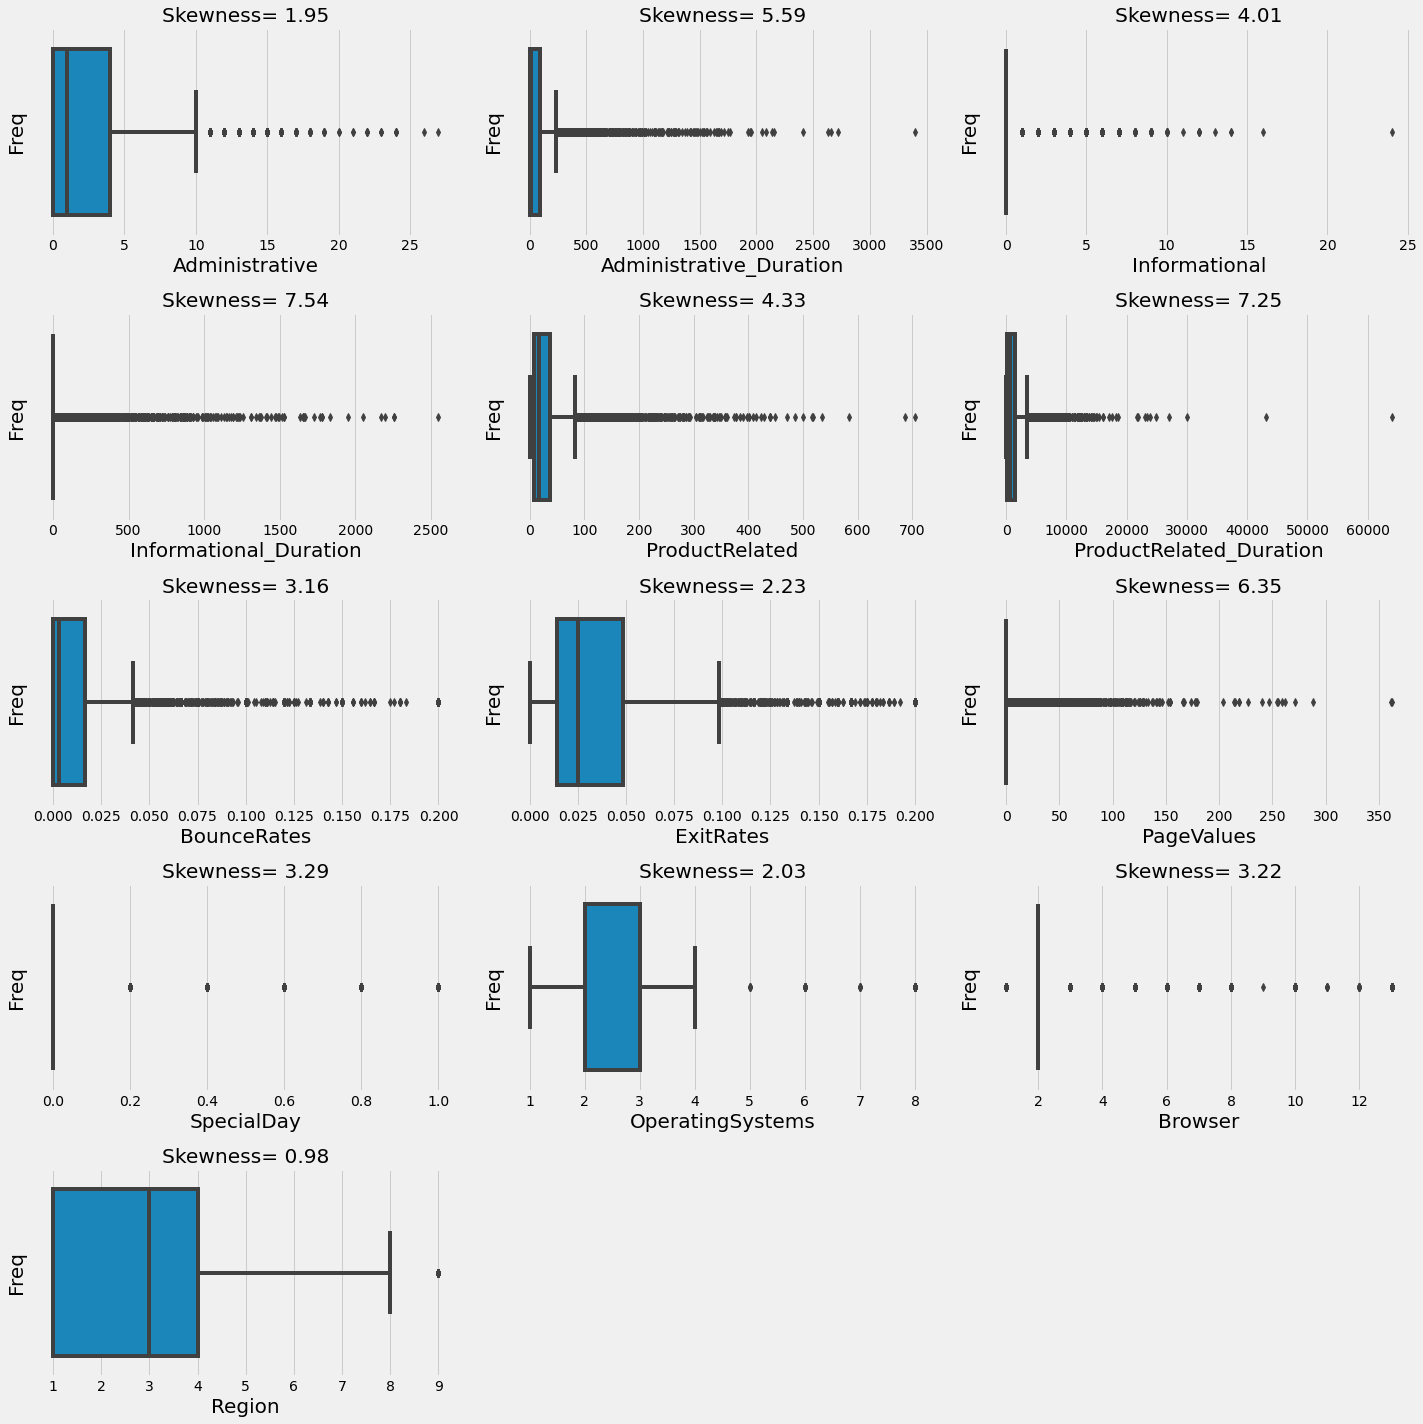

In [52]:
num_cols = df.drop(columns=['Revenue']).select_dtypes("number").iloc[:, :13].columns.tolist()
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        df[num_cols[i]],
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

In [53]:
df[num_cols].skew()

Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
dtype: float64

Yang ditransformasi hanya fitur yang memiliki skewness > 0.5. atau < -0,5. Kita juga perlu melihat lebih dekat informasi yang dikandung oleh masing-masing variabel. Mungkin ada lebih dari satu solusi untuk menangani outlier.


**Menggunakan Transformasi Logaritma**

In [54]:
transformed_to_log = df[num_cols].iloc[:,:9]
transformed_to_log

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000
...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000


In [55]:
skewed = transformed_to_log.columns.tolist()
for i in range(len(skewed)):
    df[skewed[i]] = np.log1p(df[skewed[i]])

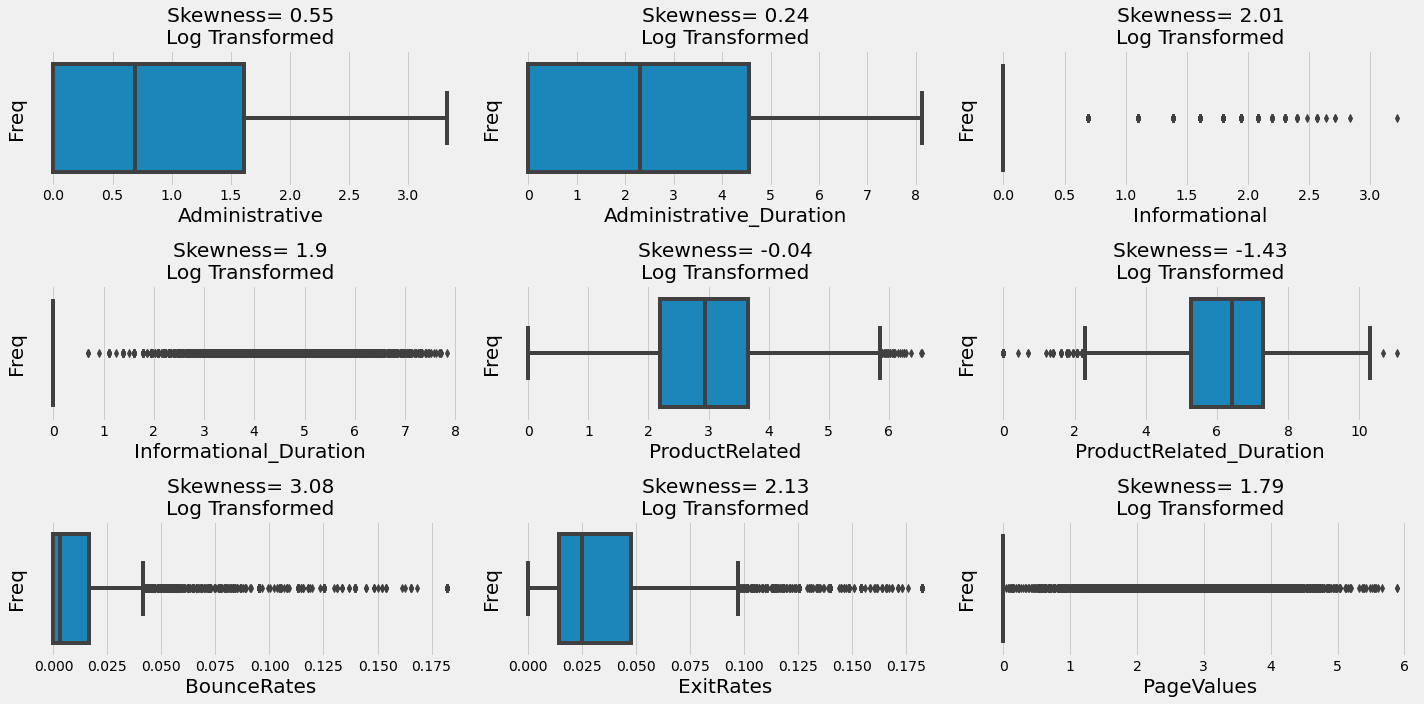

In [56]:
plt.figure(figsize=(20, 10))
for i in range(len(skewed)):
    plt.subplot(len(skewed)//3, 3, i+1)
    ax = sns.boxplot(
        df[skewed[i]],
    )
    ax.set_xlabel(skewed[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[skewed[i]].skew(),2))}\nLog Transformed")
plt.tight_layout()
plt.show()

Hanya 3 kolom/fitur yang terlihat simetris sekarang (setidaknya skewness di atas -0,5 atau di bawah 0,5). Fitur-fitur tersebut adalah `Administrative`, `Administrative_Duration`, dan `ProductRelated`. 

Tersisa 6 fitur yang masih skewed. Solusi lain adalah dengan mendropp atau membatasinya ke batas atas dan batas bawah metode IQR -+1,5 atau dikenal dengan aturan Tukey.

Jika saya mempertimbangkan jumlah data yang ada saat ini, mungkin lebih baik untuk membatasinya daripada mendrop outlier, karena saya mungkin akan kehilangan beberapa informasi jika melakukan dropping.

In [57]:
skewed = df[skewed].drop(columns =['Administrative', 'Administrative_Duration', 'ProductRelated']).columns.tolist()

In [58]:
df[skewed].skew()

Informational              2.012821
Informational_Duration     1.902106
ProductRelated_Duration   -1.427148
BounceRates                3.078066
ExitRates                  2.130249
PageValues                 1.789607
dtype: float64

Sebelum melakukan transformasi terhadap fitur fitur yang memiliki ouliers, kita perlu memeriksa kemungkinan untuk mendapatkan hasil yang lebih baik setelah melakukannya.

In [59]:
df[skewed + ["Revenue"]].groupby(['Revenue']).median()

,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Revenue,,,,,,
0,0.0,0.0,6.267201,0.003914,0.027986,0.000000
1,0.0,0.0,7.012931,0.000000,0.015873,2.876843


Dari nilai median di atas, kita dapat menyimpulkan bahwa tidak mungkin mendapatkan hasil yang lebih baik untuk fitur Informational dan Informational_Duration, bahkan setelah nilai dibatasi, karena nilai untuk setiap kelas sama dengan 0.0, dan tidak ada perbedaan antara keduanya. Oleh karena itu, akan lebih baik untuk mendrop fitur ini karena tidak memiliki kekuatan prediksi.

In [60]:
df.drop(columns = ['Informational', 'Informational_Duration'], inplace = True)

In [61]:
skewed = skewed[2:]

In [62]:
df[skewed + ["Revenue"]].groupby(['Revenue']).median()

,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Revenue,,,,
0,6.267201,0.003914,0.027986,0.000000
1,7.012931,0.000000,0.015873,2.876843


In [63]:
df[skewed].median()

ProductRelated_Duration    6.413365
BounceRates                0.002894
ExitRates                  0.024693
PageValues                 0.000000
dtype: float64

PageValues mungkin memiliki median sama dengan 0 dalam distribusi keseluruhan, tetapi ada perbedaan yang signifikan di kelas 1. Ini mungkin merupakan prediktor yang baik. 

In [64]:
def cap_outliers_tukey(x, Q1, Q3):
    '''
    to cap outliers using tukey method
    '''
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    
    if x < low_limit:
        x = low_limit
    elif x > high_limit:
        x = high_limit
    return x

In [65]:
ProductRelated_Duration_q1 = df['ProductRelated_Duration'].quantile(0.25)
ProductRelated_Duration_q3 = df['ProductRelated_Duration'].quantile(0.75)
df['ProductRelated_Duration'] = df.apply(lambda x: cap_outliers_tukey(x['ProductRelated_Duration'], ProductRelated_Duration_q1, ProductRelated_Duration_q3), axis = 1)

BounceRates_q1 = df['BounceRates'].quantile(0.25)
BounceRates_q3 = df['BounceRates'].quantile(0.75)
df['BounceRates'] = df.apply(lambda x: cap_outliers_tukey(x['BounceRates'], BounceRates_q1, BounceRates_q3), axis = 1)

ExitRates_q1 = df['ExitRates'].quantile(0.25)
ExitRates_q3 = df['ExitRates'].quantile(0.75)
df['ExitRates'] = df.apply(lambda x: cap_outliers_tukey(x['ExitRates'], ExitRates_q1, ExitRates_q3), axis = 1)

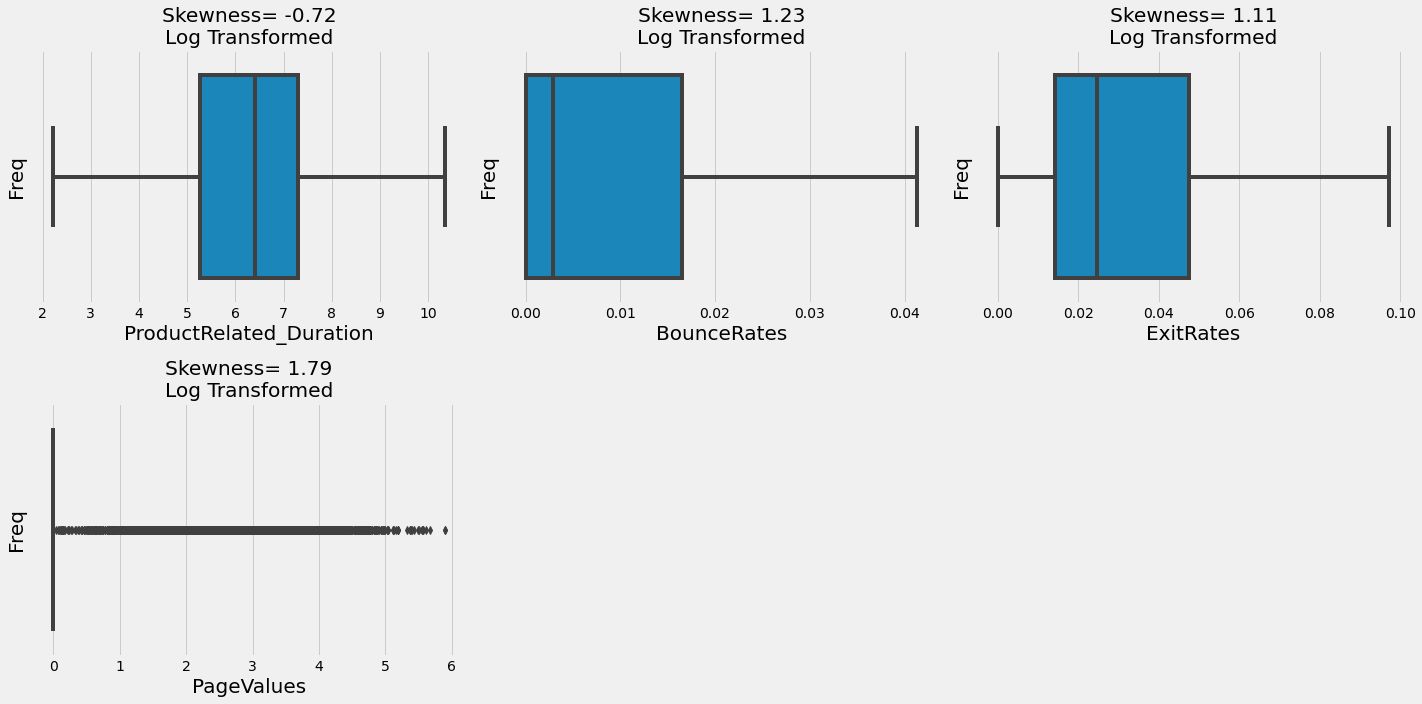

In [66]:
plt.figure(figsize=(20, 10))
for i in range(len(skewed)):
    plt.subplot(len(skewed)//3+1, 3, i+1)
    ax = sns.boxplot(
        df[skewed[i]],
    )
    ax.set_xlabel(skewed[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[skewed[i]].skew(),2))}\nLog Transformed")
plt.tight_layout()
plt.show()

Beberapa fitur masih terlihat asimetris bahkan setelah transformasi. Namun meski begitu, semua nilai skewness lebih kecil sekarang.

## Binning Numerical Values

In [67]:
df[['SpecialDay', 'OperatingSystems', 'Browser', 'Region']]

,SpecialDay,OperatingSystems,Browser,Region
0,0.0,1,1,1
1,0.0,2,2,1
2,0.0,4,1,9
3,0.0,3,2,2
4,0.0,3,3,1
...,...,...,...,...
12325,0.0,4,6,1
12326,0.0,3,2,1
12327,0.0,3,2,1
12328,0.0,2,2,3


**SpecialDay**

In [68]:
df['SpecialDay'].value_counts()

0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [69]:
df['SpecialDay'] = np.where(df['SpecialDay'] != 0.0, 1, 0)

In [70]:
df['SpecialDay'].value_counts()

0    10956
1     1249
Name: SpecialDay, dtype: int64

**OperatingSystems**

In [71]:
df['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [72]:
def operating_system(x):
    if x['OperatingSystems'] not in [2, 1, 3]:
        os = 'other'
    else:
        os = int(x['OperatingSystems'])
    return os

In [73]:
df['OperatingSystems'] = df.apply(lambda x: operating_system(x), axis = 1)

In [74]:
df['OperatingSystems'].value_counts()

2        6541
1        2549
3        2530
other     585
Name: OperatingSystems, dtype: int64

**Browser**

In [75]:
df['Browser'].value_counts()

2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [76]:
def browser(x):
    if x['Browser'] not in [2, 1]:
        browser = 'other'
    else:
        browser = int(x['Browser'])
    return browser

In [77]:
df['Browser'] = df.apply(lambda x: browser(x), axis = 1)

In [78]:
df['Browser'].value_counts()

2        7883
1        2427
other    1895
Name: Browser, dtype: int64

### One-Hot Encoding

In [79]:
ohe = ['SpecialDay', 'OperatingSystems', 'Browser', 'Region']

In [80]:
for i in range(len(ohe)):
    dummies = pd.get_dummies(df[ohe[i]], prefix = ohe[i], drop_first=True)
    df = pd.concat([df, dummies], axis = 1)
    
df.drop(columns = ohe, inplace = True)

In [81]:
print(df.shape)
df.head()

(12205, 28)


,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType,Revenue,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Month_sin,Month_cos,SpecialDay_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_other,Browser_2,Browser_other,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,0.0,0.0,0.693147,2.221821,0.041323,0.097276,0.0,1,0,0,1,0,0.866025,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.098612,4.174387,0.000000,0.095310,0.0,2,0,0,1,0,0.866025,0.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.693147,2.221821,0.041323,0.097276,0.0,3,0,0,1,0,0.866025,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,1.098612,2.221821,0.041323,0.097276,0.0,4,0,0,1,0,0.866025,0.5,0,0,1,0,1,0,1,0,0,0,0,0,0,0
4,0.0,0.0,2.397895,6.443336,0.019803,0.048790,0.0,4,0,0,1,1,0.866025,0.5,0,0,1,0,0,1,0,0,0,0,0,0,0,0


Jumlah kolom akhir yang akan digunakan adalah 28 (termasuk variabel target).

## Split Dataset

In [84]:
np.random.seed(14)

In [85]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

Dataset akan dibagi menjadi 70% train set, 20% test set, dan 10% inference set.

In [86]:
X_, X_inf, y_, y_inf = train_test_split(X, y, stratify = y, random_state = 14, test_size = 0.1)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, stratify = y_, random_state = 14, test_size = 2/9)

In [87]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'TrafficType', 'VisitorType_Other', 'VisitorType_Returning_Visitor',
       'Weekend_True', 'Month_sin', 'Month_cos', 'SpecialDay_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_other',
       'Browser_2', 'Browser_other', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9'],
      dtype='object')

## Features Scaling

Feature Scaling akan diintegrasikan ke dalam pipeline. Scaling akan menggunakan StandardScaler oleh sklearn

## Target Variable Sampling (Reduce Imbalance)

Karena imbalance class, kita perlu menyeimbangkan kelas di training set untuk membuat model lebih baik. Ini akan dilakukan dengan menggunakan metode oversampling dengan SMOTE. Proses ini juga akan dilakukan di pipeline.

In [408]:
print(f"Persentase kelas 0 : {round(y_train.value_counts()[0]/len(y_train), 4)}")
print(f"Persentase kelas 1: {round(y_train.value_counts()[1]/len(y_train), 4)}")

Persentase kelas 0 : 0.8437
Persentase kelas 1: 0.1563


# Define Model

Menentukan semua base model untuk setiap algoritma yang akan digunakan di dalam pipeline.

In [409]:
logreg = LogisticRegression(random_state = 14)
svc = SVC(random_state = 14)
dt = DecisionTreeClassifier(random_state = 14)
rf = RandomForestClassifier(random_state = 14)
adb = AdaBoostClassifier(random_state = 14)
knn = KNeighborsClassifier()
gnb = GaussianNB()

## Base Model

Saya akan menggunakan pipeline pada base model

In [410]:
# pipeline menggunakan SMOTE oversampling
pipe_base = imbpipeline(steps=[
    ['oversampling', SMOTE(random_state=14, sampling_strategy = 1/3)],
    ['scaler', StandardScaler()],
    ['classifier', LogisticRegression()]
], memory="cache_folder")

In [411]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

In [412]:
# grid all base models
param_grid_base = [
    {'classifier': [logreg]}, {'classifier': [svc]},
    {'classifier': [dt]}, {'classifier': [rf]},
    {'classifier': [adb]}, {'classifier': [knn]},
    {'classifier': [gnb]}
]

# scoring metrics
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
}

In [413]:
base_grid = GridSearchCV(estimator = pipe_base, param_grid = param_grid_base, cv = stratified_kfold, scoring=scoring, refit='auc', n_jobs = -1, return_train_score=True)

# Model Training

In [414]:
%time print(base_grid.fit(X_train, y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
             estimator=Pipeline(memory='cache_folder',
                                steps=[['oversampling',
                                        SMOTE(random_state=14,
                                              sampling_strategy=0.3333333333333333)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', LogisticRegression()]]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(random_state=14)]},
                         {'classifie...
                         {'classifier': [DecisionTreeClassifier(random_state=14)]},
                         {'classifier': [RandomForestClassifier(random_state=14)]},
                         {'classifier': [AdaBoostClassifier(random_state=14)]},
                         {'classifier': [KNeighborsClassifier()]},
                         {'classifier': [GaussianNB()]}],

# Model Evaluation

In [415]:
base_grid_best_estimator = base_grid.best_estimator_
base_grid_best_estimator

Pipeline(memory='cache_folder',
         steps=[('oversampling',
                 SMOTE(random_state=14, sampling_strategy=0.3333333333333333)),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=14))])

Dari hasil di atas, didapatkan estimator terbaik antara base model yaitu Random Forest.

In [416]:
# plot tree 
def rf_tree_plot(classifier, nth_estimator, depth, class_names=['0','1']):
    tree.plot_tree(
        classifier.estimators_[nth_estimator],
        feature_names = X.columns.tolist(), 
        class_names=class_names,
        filled = True, max_depth=depth, fontsize=12
    )

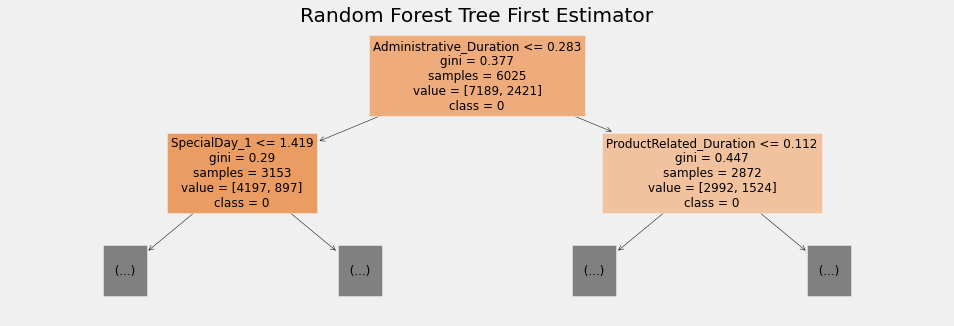

In [417]:
fig, ax = plt.subplots(figsize=(15, 5))
rf_tree_plot(base_grid_best_estimator['classifier'], 0, 1)
plt.title("Random Forest Tree First Estimator")
plt.show()

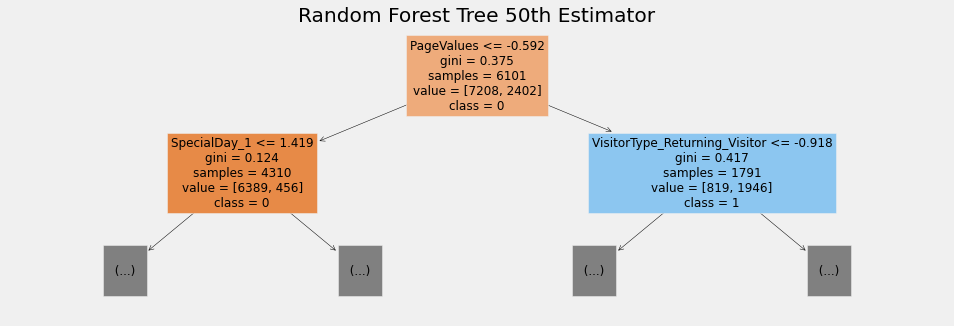

In [418]:
fig, ax = plt.subplots(figsize=(15, 5))
rf_tree_plot(base_grid_best_estimator['classifier'], 49, 1)
plt.title("Random Forest Tree 50th Estimator")
plt.show()

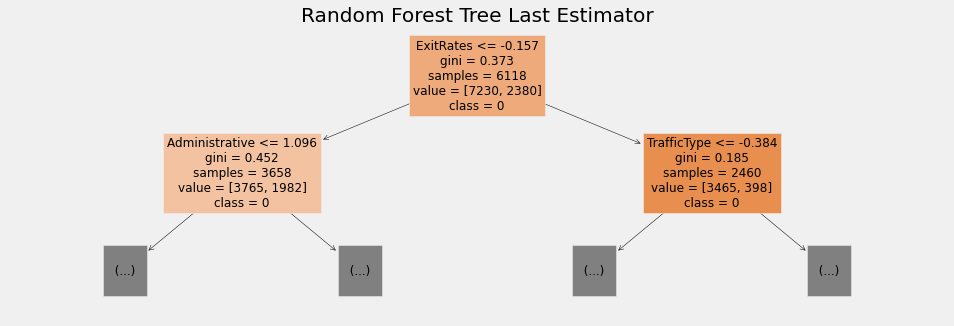

In [419]:
fig, ax = plt.subplots(figsize=(15, 5))
rf_tree_plot(base_grid_best_estimator['classifier'], -1, 1)
plt.title("Random Forest Tree Last Estimator")
plt.show()

In [420]:
def feature_importance(model, name):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(60).plot(kind='barh', color = '#4169E1')
    plt.axhline(y = 9.5, linestyle='--', color = '#FF00FF', linewidth=2)
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title((name) + ' Feature Importance Score ')

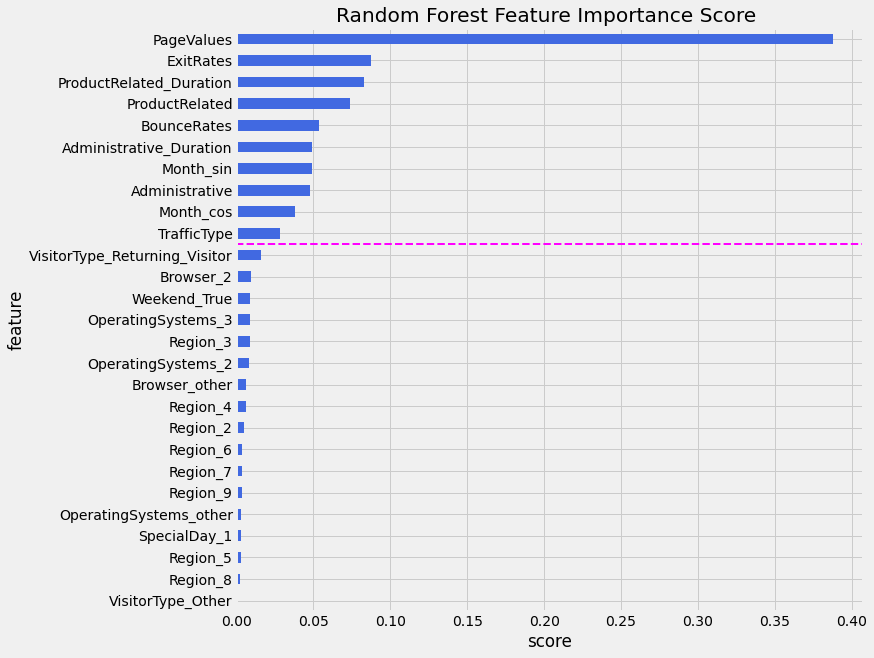

In [421]:
plt.figure(figsize=(10,10))
feature_importance(base_grid_best_estimator['classifier'], 'Random Forest')
plt.show()

Fitur `PageValues` memiliki importance score yang paling tinggi, hal ini membuktikan bahwa memang fitur ini memiliki pengaruh yang kuat terhadap predeksi yang akan dilakukan.

In [422]:
print(f"Best Estimator: {base_grid_best_estimator['classifier']}")
print(f"Best Score: {base_grid.best_score_}")

Best Estimator: RandomForestClassifier(random_state=14)
Best Score: 0.9263747787254774


Best score untuk AUC test adalah 92.63%.

In [423]:
base_grid_result = pd.DataFrame(base_grid.cv_results_).drop(columns=['params'])
base_grid_result['classifier_name'] = base_grid_result['param_classifier'].astype(str).str.replace(r"\(.*\)","")
base_grid_result[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'std_train_auc', 'mean_test_f1', 'std_test_f1', 'mean_train_f1', 'std_train_f1', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'mean_test_precision', 'std_test_precision', 'mean_train_precision', 'std_train_precision']].sort_values('rank_test_auc')

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,std_train_auc,mean_test_f1,std_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,mean_train_precision,std_train_precision
3,1,RandomForestClassifier,0.926375,0.006022,1.000000,0.000000,0.664785,0.019616,1.000000,0.000000,0.635206,0.022296,1.000000,0.000000,0.697586,0.021547,1.000000,0.000000
4,2,AdaBoostClassifier,0.910967,0.010588,0.922248,0.001895,0.640498,0.013926,0.655981,0.008669,0.641948,0.017015,0.654120,0.012557,0.639313,0.015989,0.657935,0.006796
0,3,LogisticRegression,0.900484,0.010107,0.905082,0.002067,0.638142,0.021237,0.643681,0.003385,0.627715,0.031568,0.632772,0.004789,0.649424,0.013210,0.655014,0.005108
1,4,SVC,0.893529,0.011211,0.938345,0.002367,0.655077,0.008152,0.709490,0.003777,0.667416,0.015605,0.722285,0.009578,0.643397,0.006741,0.697437,0.012406
6,5,GaussianNB,0.826749,0.010842,0.832317,0.005470,0.458691,0.006112,0.460719,0.007955,0.776030,0.015424,0.783895,0.015795,0.325674,0.006874,0.326254,0.006044
5,6,KNeighborsClassifier,0.821207,0.010373,0.946316,0.001879,0.512766,0.018717,0.681769,0.013399,0.480899,0.025136,0.661423,0.021324,0.549868,0.018288,0.703706,0.008472
2,7,DecisionTreeClassifier,0.752317,0.013392,1.000000,0.000000,0.570517,0.013669,1.000000,0.000000,0.595506,0.032218,1.000000,0.000000,0.548376,0.003238,1.000000,0.000000


Random Forest memiliki skor yang lebih besar di hampir semua metrik evaluasi, kecuali untuk Recall.


## Separate Test Set

In [424]:
# plot ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=3, label=label)
    plt.plot([-0.1, 1.1], [-0.1, 1.1], 'k--') 
    plt.axis([-0.1, 1.1, -0.1, 1.1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)  

Saya akan menggunakan best estimator dari model terbaik untuk mengevaluasi menggunakan Test set.

In [425]:
# save grid search and pipeline components untuk test dan data baru tanpa oversampling SMOTE
base_scaler = base_grid_best_estimator['scaler']
base_classifier = base_grid_best_estimator['classifier']

Saya akan mengubah test set dan menghitung prediksi dan skor probabilitasnya.

In [426]:
X_test_trf = base_scaler.transform(X_test)
y_test_pred = base_classifier.predict(X_test_trf)
y_test_scores = base_classifier.predict_proba(X_test_trf)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_scores[:, 1])

X_train_trf = base_scaler.transform(X_train)
y_train_pred = base_classifier.predict(X_train_trf)
y_train_scores = base_classifier.predict_proba(X_train_trf)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_scores[:, 1])

In [427]:
confusion_matrix(y_test, y_test_pred)

array([[1959,  100],
       [ 131,  251]], dtype=int64)

In [428]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2059
           1       0.72      0.66      0.68       382

    accuracy                           0.91      2441
   macro avg       0.83      0.80      0.81      2441
weighted avg       0.90      0.91      0.90      2441



In [429]:
roc_auc_score(y_test, y_test_pred)

0.804250398582141

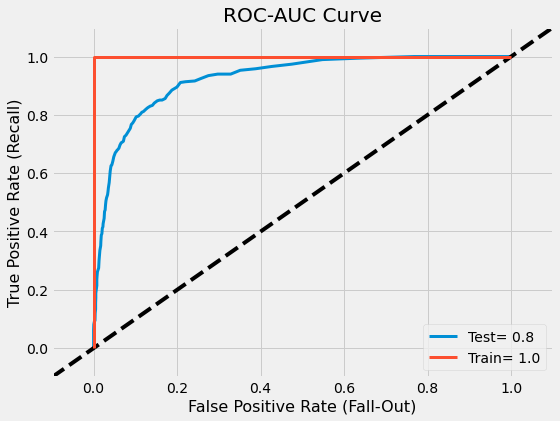

In [430]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr_test, tpr_test, label="Test" + "= " + str(round(roc_auc_score(y_test, y_test_pred),2)))
plt.plot(fpr_train, tpr_train, label="Train" + "= " + str(round(roc_auc_score(y_train, y_train_pred),2)), linewidth=3)
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

Skor untuk Test set terpisah memiliki perbedaan sekitar 20% terhadap Train set. Kita dapat menyimpulkan bahwa model ini overfitting. Oleh karena itu, kita harus mengatur beberapa hyperparameter yang akan mengurangi overfitting dari random forest.

## Evaluation

In [431]:
base_result = base_grid_result[['classifier_name', 'mean_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision',]]
base_result.columns = ['classifier_name', 'test_auc', 'train_auc', 'test_f1','train_f1', 'test_recall', 'train_recall','test_precision', 'train_precision']
base_result.set_index('classifier_name', inplace= True)
base_result.sort_values('test_auc', ascending=False)

,test_auc,train_auc,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
classifier_name,,,,,,,,
RandomForestClassifier,0.926375,1.000000,0.664785,1.000000,0.635206,1.000000,0.697586,1.000000
AdaBoostClassifier,0.910967,0.922248,0.640498,0.655981,0.641948,0.654120,0.639313,0.657935
LogisticRegression,0.900484,0.905082,0.638142,0.643681,0.627715,0.632772,0.649424,0.655014
SVC,0.893529,0.938345,0.655077,0.709490,0.667416,0.722285,0.643397,0.697437
GaussianNB,0.826749,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254
KNeighborsClassifier,0.821207,0.946316,0.512766,0.681769,0.480899,0.661423,0.549868,0.703706
DecisionTreeClassifier,0.752317,1.000000,0.570517,1.000000,0.595506,1.000000,0.548376,1.000000


In [432]:
def plot_metrics_comparison(df, model_group_name):
    '''
    Only for ROC_AUC, F1, Precision, Recall Metrics
    '''
    metrics = ['f1', 'precision', 'recall', 'auc']
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.suptitle(model_group_name, fontsize=28)
    
    from itertools import combinations
    axes_list = set(combinations([0, 1]*2, 2))

    for i, j in zip(range(len(metrics)), axes_list):
        ax = df[["train_" + str(metrics[i]), "test_" + str(metrics[i])]].sort_values("test_" + str(metrics[i]), ascending=True).plot.barh(width=0.7, color={"train_" + str(metrics[i]): '#5EE6EB', "test_" + str(metrics[i]): '#F0A500'}, ax=axes[j])

        for p in ax.patches:
            ax.annotate(
                format(p.get_width()*100, '.0f') + "%",
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left',
                fontweight = "bold",
                xytext = (-42,-5), 
                textcoords = 'offset points',
                color = 'white',
                fontsize=14
            )
        ax.set_title(str(metrics[i]).upper(), fontsize = 25)

        handles, labels = ax.get_legend_handles_labels()
        handles = [handles[1], handles[0]]
        labels = [labels[1], labels[0]]

        L = ax.legend(handles, labels, loc="lower right", bbox_to_anchor=(1, 0))
        L.get_texts()[1].set_text('Train')
        L.get_texts()[0].set_text('Test')

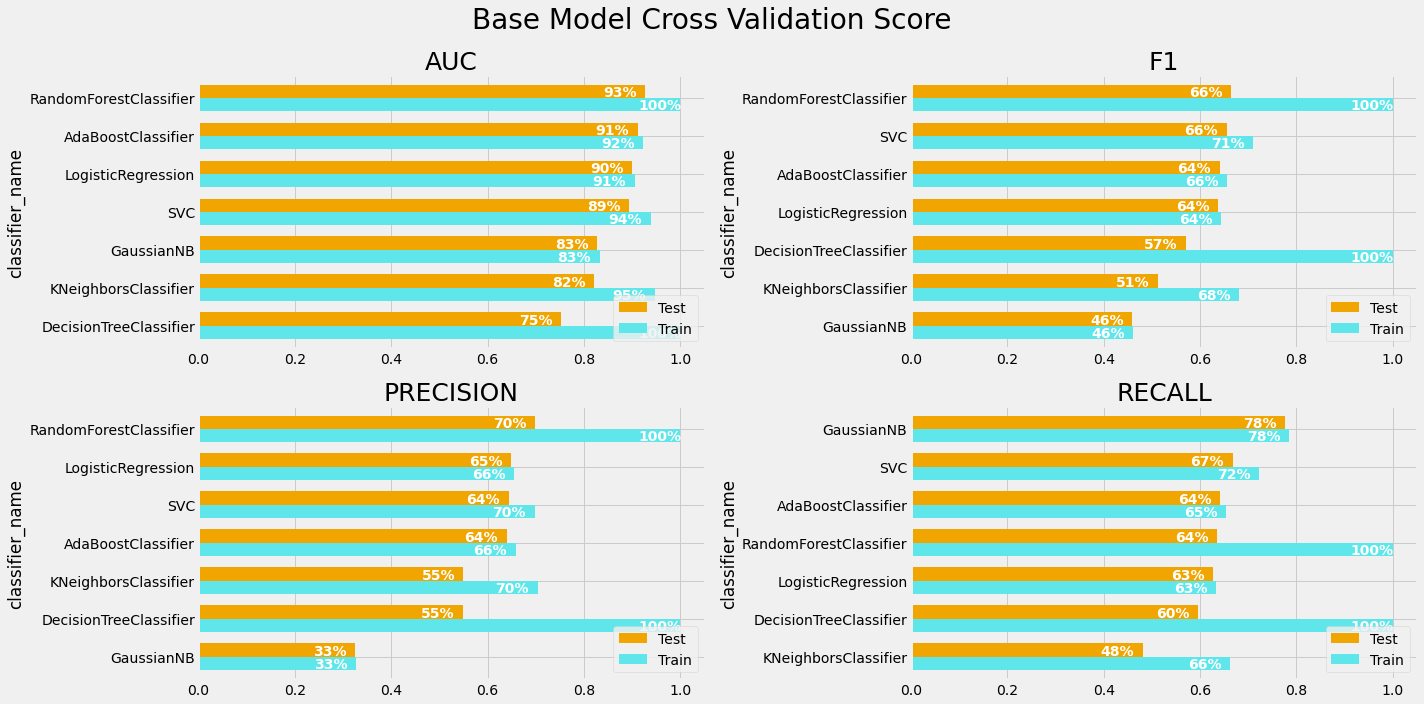

In [433]:
plot_metrics_comparison(base_result, 'Base Model Cross Validation Score')
plt.tight_layout()
plt.show()

- Untuk AUC score, random forest mendapatkan nilai tertinggi pada `test` yaitu sebesar 93%, dilanjutkan dengan AdaBoost Classifier, Logistic Regression, dan SVC. 

- Untuk nilai F1, random forest juga mendapat nilai tertinggi pada `test`, namun masih memiliki perbedaan 34% dibandingkan dengan training set. Logistic Regression, SVC, dan AdaBoost menunjukkan skor yang konsisten pada test dan train set.

- Untuk skor presisi, random forest memiliki skor lebih tinggi pada `test set` dibandingkan dengan yang lain. Tetapi test dan train set memiliki perbedaan yang besar sekitar 30%.

- Sementara untuk recall, Gaussian Naive Bayes memiliki skor tertinggi, sedangkan Random Forest sekali lagi menunjukkan kecenderungan untuk overfitting pada train set.

# Model Improvement

In [434]:
logreg = LogisticRegression(random_state = 14)
svc = SVC(random_state = 14)
dt = DecisionTreeClassifier(random_state = 14)
rf = RandomForestClassifier(random_state = 14)
adb = AdaBoostClassifier(random_state = 14)
knn = KNeighborsClassifier()
gnb = GaussianNB()

Karena kita ingin me-resample kelas minoritas, kita tidak bisa hanya menggunakan Pipeline dari sklearn, kita harus menggunakan imbpipeline dari imblearn.

In [435]:
# pipeline menggunakan SMOTE oversampling
pipe_best = imbpipeline(steps=[
    ['oversampling', SMOTE(random_state=14, sampling_strategy = 1/3)],
    ['scaler', StandardScaler()],
    ['classifier', LogisticRegression()]
], memory="cache_folder")

In [436]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

In [437]:
param_grid_best = [
    {'classifier': [logreg], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.01, 1]},
    {'classifier': [svc], 'classifier__kernel': ['poly', 'rbf'], 'classifier__degree': [3, 4], 'classifier__C': [0.01, 1]},
    {'classifier': [dt], 'classifier__max_depth': [None, 2, 10, 30, 100], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf' : [1, 4, 10], 'classifier__max_features' : ['auto', 'sqrt']},
    {'classifier': [rf], 'classifier__max_depth': [None, 2, 10, 30, 100], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf' : [1, 4, 10], 'classifier__max_features' : ['auto', 'sqrt'], 'classifier__n_estimators': [20, 50, 100]},
    {'classifier': [adb], 'classifier__learning_rate': [0.1, 1.0], 'classifier__n_estimators': [20, 50]},
    {'classifier': [knn], 'classifier__n_neighbors': [5, 10], 'classifier__p': [1, 2]},
    {'classifier': [gnb], 'classifier__var_smoothing': np.logspace(0,-9, num=10)}
]

scoring = {
    'auc': 'roc_auc',
    'f1': 'f1',
    'recall': 'recall',
    'precision': 'precision',
}

In [438]:
best_grid = GridSearchCV(estimator = pipe_best, param_grid = param_grid_best, cv = stratified_kfold, scoring=scoring, refit='auc', n_jobs = -1, return_train_score=True)

## Model Training

In [439]:
%time print(best_grid.fit(X_train, y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=14, shuffle=True),
             estimator=Pipeline(memory='cache_folder',
                                steps=[['oversampling',
                                        SMOTE(random_state=14,
                                              sampling_strategy=0.3333333333333333)],
                                       ['scaler', StandardScaler()],
                                       ['classifier', LogisticRegression()]]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(random_state=14)],
                          'classifier_...
                          'classifier__n_estimators': [20, 50]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [5, 10],
                          'classifier__p': [1, 2]},
                         {'classifier': [GaussianNB()],
                          'classifier__var_smoothing': array([1.e+00, 

In [440]:
best_grid_best_estimator = best_grid.best_estimator_
best_grid_best_estimator

Pipeline(memory='cache_folder',
         steps=[('oversampling',
                 SMOTE(random_state=14, sampling_strategy=0.3333333333333333)),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=14))])

In [441]:
print(f"Best Estimator: {best_grid_best_estimator['classifier']}")
print(f"Best Params: {best_grid.best_params_}")
print(f"Best Score: {best_grid.best_score_}")

Best Estimator: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=14)
Best Params: {'classifier': RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=14), 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Score: 0.9312400774402295


Best model nya masih Random Forest.

In [442]:
best_grid_result = pd.DataFrame(best_grid.cv_results_).drop(columns=['params'])
best_grid_result['classifier_name'] = best_grid_result['param_classifier'].astype(str).str.replace(r"\(.*\)","")
best_grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__degree,param_classifier__kernel,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__learning_rate,param_classifier__n_neighbors,param_classifier__p,param_classifier__var_smoothing,split0_test_auc,split1_test_auc,split2_test_auc,split3_test_auc,split4_test_auc,mean_test_auc,std_test_auc,rank_test_auc,split0_train_auc,split1_train_auc,split2_train_auc,split3_train_auc,split4_train_auc,mean_train_auc,std_train_auc,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision,classifier_name
0,0.043064,0.008363,0.000000,0.000000,LogisticRegression(random_state=14),0.01,l1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LogisticRegression
1,0.108060,0.030793,0.019694,0.005464,LogisticRegression(random_state=14),0.01,l2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.899858,0.892552,0.907115,0.918687,0.896800,0.903002,0.009170,221,0.907150,0.909114,0.907077,0.903125,0.907101,0.906713,0.001955,0.667932,0.612967,0.609901,0.647940,0.632184,0.634185,0.021781,224,0.630414,0.639540,0.640498,0.635659,0.642718,0.637766,0.004327,0.659176,0.584270,0.576779,0.647940,0.617978,0.617228,0.032942,228,0.613296,0.625468,0.626404,0.614232,0.619850,0.619850,0.005460,0.676923,0.644628,0.647059,0.647940,0.647059,0.652722,0.012151,240,0.648515,0.654261,0.655240,0.658635,0.667339,0.656798,0.006196,LogisticRegression
2,0.044143,0.010550,0.000000,0.000000,LogisticRegression(random_state=14),1,l1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LogisticRegression
3,0.139241,0.055469,0.024188,0.022313,LogisticRegression(random_state=14),1,l2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898030,0.890401,0.904183,0.918138,0.891669,0.900484,0.010107,222,0.905617,0.907568,0.905600,0.901268,0.905356,0.905082,0.002067,0.671670,0.613900,0.622309,0.653061,0.629771,0.638142,0.021237,223,0.637227,0.646780,0.645804,0.643678,0.644914,0.643681,0.003385,0.670412,0.595506,0.595506,0.659176,0.617978,0.627715,0.031568,215,0.628277,0.639513,0.637640,0.629213,0.629213,0.632772,0.004789,0.672932,0.633466,0.651639,0.647059,0.642023,0.649424,0.013210,242,0.646435,0.654215,0.654179,0.658824,0.661417,0.655014,0.005108,LogisticRegression
4,2.632660,0.122448,0.736976,0.084999,SVC(random_state=14),0.01,NaN,3,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884854,0.877836,0.898066,0.914900,0.896316,0.894394,0.012672,259,0.915499,0.916021,0.911557,0.909881,0.911070,0.912806,0.002479,0.022222,0.014870,0.000000,0.022222,0.022140,0.016291,0.008625,352,0.018536,0.018536,0.022202,0.016698,0.029520,0.021098,0.004575,0.011236,0.0

In [443]:
best_grid_result[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'std_train_auc', 'mean_test_f1', 'std_test_f1', 'mean_train_f1', 'std_train_f1', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'mean_test_precision', 'std_test_precision', 'mean_train_precision', 'std_train_precision']].sort_values('rank_test_auc')

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,std_train_auc,mean_test_f1,std_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,mean_train_precision,std_train_precision
362,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
281,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
146,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
308,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
119,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,389,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Separate Test Set

In [444]:
best_scaler = best_grid_best_estimator['scaler']
best_classifier = best_grid_best_estimator['classifier']

In [445]:
X_test_trf = best_scaler.transform(X_test)
y_test_pred = best_classifier.predict(X_test_trf)
y_test_scores = best_classifier.predict_proba(X_test_trf)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_scores[:, 1])

X_train_trf = best_scaler.transform(X_train)
y_train_pred = best_classifier.predict(X_train_trf)
y_train_scores = best_classifier.predict_proba(X_train_trf)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_scores[:, 1])

In [446]:
confusion_matrix(y_test, y_test_pred)

array([[1943,  116],
       [ 133,  249]], dtype=int64)

In [447]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2059
           1       0.68      0.65      0.67       382

    accuracy                           0.90      2441
   macro avg       0.81      0.80      0.80      2441
weighted avg       0.90      0.90      0.90      2441



In [448]:
roc_auc_score(y_test, y_test_pred)

0.7977472162819851

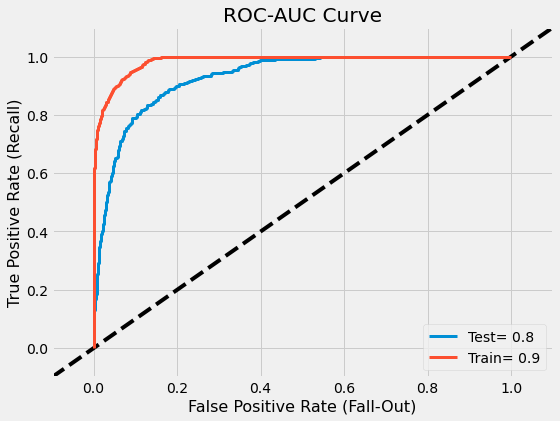

In [449]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr_test, tpr_test, label="Test" + "= " + str(round(roc_auc_score(y_test, y_test_pred),2)))
plt.plot(fpr_train, tpr_train, label="Train" + "= " + str(round(roc_auc_score(y_train, y_train_pred),2)), linewidth=3)
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

Jika kita membandingkan skor AUC ini dengan model dasar, overfitting tampaknya berkurang, karena sekarang, perbedaan antara train dan test set sekitar 10%.

## Evaluation

**Logistic Regression**

In [450]:
base_grid_result[base_grid_result['classifier_name'] == 'LogisticRegression'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
0,3,LogisticRegression,0.900484,0.010107,0.905082,0.638142,0.643681,0.627715,0.632772,0.649424,0.655014


In [451]:
best_grid_result[best_grid_result['classifier_name'] == 'LogisticRegression'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
1,221,LogisticRegression,0.903002,0.009170,0.906713,0.634185,0.637766,0.617228,0.619850,0.652722,0.656798
3,222,LogisticRegression,0.900484,0.010107,0.905082,0.638142,0.643681,0.627715,0.632772,0.649424,0.655014
2,389,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,390,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Membandingkan Logistic Regression base model dengan best model (setelah tuning hyperparameters):
- AUC test set meningkat dari 90.04% menjadi 90.3%, juga pada training set dari 90.5% menjadi 90.6%.
- F1 test set menurun dari 63.81% menjadi 63.41%, juga pada training set dari 64.3% to 63.7%.
- Recall test set menurun dari 62.77% menjadi 61.7%, juga pada training set dari 63.2% menjadi 61.9%.
- Precision test set meningkat dari 64.9% menjadi 65.2%, juga pada training set dari 65.5% menjadi 65.6%.

**SVC**

In [452]:
base_grid_result[base_grid_result['classifier_name'] == 'SVC'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
1,4,SVC,0.893529,0.011211,0.938345,0.655077,0.70949,0.667416,0.722285,0.643397,0.697437


In [453]:
best_grid_result[best_grid_result['classifier_name'] == 'SVC'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
4,259,SVC,0.894394,0.012672,0.912806,0.016291,0.021098,0.008240,0.010674,0.750000,0.928252
9,260,SVC,0.893529,0.011211,0.938345,0.655077,0.709490,0.667416,0.722285,0.643397,0.697437
11,260,SVC,0.893529,0.011211,0.938345,0.655077,0.709490,0.667416,0.722285,0.643397,0.697437
5,262,SVC,0.887340,0.007164,0.897772,0.356634,0.354561,0.238202,0.236142,0.714099,0.712404
7,262,SVC,0.887340,0.007164,0.897772,0.356634,0.354561,0.238202,0.236142,0.714099,0.712404
8,282,SVC,0.884216,0.011150,0.941988,0.633908,0.721526,0.617228,0.708801,0.651808,0.734946
6,284,SVC,0.856498,0.008369,0.917144,0.033712,0.044985,0.017228,0.023034,0.921429,0.974242
10,285,SVC,0.852338,0.012579,0.954995,0.567532,0.716031,0.488390,0.630899,0.677557,0.827855


**DecisionTreeClassifier**

In [454]:
base_grid_result[base_grid_result['classifier_name'] == 'DecisionTreeClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
2,7,DecisionTreeClassifier,0.752317,0.013392,1.0,0.570517,1.0,0.595506,1.0,0.548376,1.0


In [455]:
best_grid_result[best_grid_result['classifier_name'] == 'DecisionTreeClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
101,288,DecisionTreeClassifier,0.844977,0.017372,0.938514,0.528769,0.670072,0.528839,0.66367,0.53041,0.677439
100,288,DecisionTreeClassifier,0.844977,0.017372,0.938514,0.528769,0.670072,0.528839,0.66367,0.53041,0.677439
29,288,DecisionTreeClassifier,0.844977,0.017372,0.938514,0.528769,0.670072,0.528839,0.66367,0.53041,0.677439
28,288,DecisionTreeClassifier,0.844977,0.017372,0.938514,0.528769,0.670072,0.528839,0.66367,0.53041,0.677439
72,288,DecisionTreeClassifier,0.844977,0.017372,0.938514,0.528769,0.670072,0.528839,0.66367,0.53041,0.677439
...,...,...,...,...,...,...,...,...,...,...,...
32,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
31,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
30,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
38,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


**RandomForestClassifier**

In [456]:
base_grid_result[base_grid_result['classifier_name'] == 'RandomForestClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
3,1,RandomForestClassifier,0.926375,0.006022,1.0,0.664785,1.0,0.635206,1.0,0.697586,1.0


In [457]:
best_grid_result[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'std_train_auc', 'mean_test_f1', 'std_test_f1', 'mean_train_f1', 'std_train_f1', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'mean_test_precision', 'std_test_precision', 'mean_train_precision', 'std_train_precision']].sort_values('rank_test_auc')

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,std_train_auc,mean_test_f1,std_test_f1,mean_train_f1,std_train_f1,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,mean_test_precision,std_test_precision,mean_train_precision,std_train_precision
362,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
281,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
146,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
308,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
119,1,"RandomForestClassifier(min_samples_leaf=4, min...",0.931240,0.006404,0.986366,0.000607,0.678302,0.009027,0.843377,0.006087,0.660674,0.020459,0.809738,0.008235,0.697382,0.004204,0.880028,0.009027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,371,DecisionTreeClassifier,0.681067,0.010424,0.686796,0.003647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,389,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Membandingkan Random Forest base model dan best model (setelah tuning hyperparameters):
- AUC test set meningkat dari 92.63% menjadi 93.1%, tapi menurun pada training set 100% menjadi 98%.
- F1 test set meningkat dari 66.4 menjadi 67.8%, tapi menurun pada training set.
- Recall test set meningkat dari 63% menjadi 66%, tapi menurun pada training set.
- Precision test set tidak terjadi perubahan namun menurun pada training set.

**AdaBoostClassifier**

In [458]:
base_grid_result[base_grid_result['classifier_name'] == 'AdaBoostClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
4,2,AdaBoostClassifier,0.910967,0.010588,0.922248,0.640498,0.655981,0.641948,0.65412,0.639313,0.657935


In [459]:
best_grid_result[best_grid_result['classifier_name'] == 'AdaBoostClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
373,211,AdaBoostClassifier,0.916294,0.006892,0.919074,0.659531,0.666559,0.701124,0.708052,0.622895,0.629818
374,218,AdaBoostClassifier,0.911615,0.010201,0.918964,0.642956,0.655384,0.648689,0.660112,0.637582,0.650935
375,219,AdaBoostClassifier,0.910967,0.010588,0.922248,0.640498,0.655981,0.641948,0.654120,0.639313,0.657935
372,220,AdaBoostClassifier,0.907114,0.008106,0.910402,0.666124,0.672806,0.734831,0.743258,0.609687,0.614903


**KNeighborsClassifier**

In [460]:
base_grid_result[base_grid_result['classifier_name'] == 'KNeighborsClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
5,6,KNeighborsClassifier,0.821207,0.010373,0.946316,0.512766,0.681769,0.480899,0.661423,0.549868,0.703706


In [461]:
best_grid_result[best_grid_result['classifier_name'] == 'KNeighborsClassifier'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
378,283,KNeighborsClassifier,0.859321,0.014824,0.936766,0.502597,0.621110,0.414232,0.535393,0.639794,0.739889
379,287,KNeighborsClassifier,0.848018,0.012162,0.923717,0.494240,0.594066,0.409738,0.507491,0.623283,0.716762
376,317,KNeighborsClassifier,0.826604,0.012966,0.954802,0.509110,0.717151,0.465918,0.699438,0.561403,0.735951
377,322,KNeighborsClassifier,0.821207,0.010373,0.946316,0.512766,0.681769,0.480899,0.661423,0.549868,0.703706


**GaussianNB**

In [462]:
base_grid_result[base_grid_result['classifier_name'] == 'GaussianNB'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
6,5,GaussianNB,0.826749,0.010842,0.832317,0.458691,0.460719,0.77603,0.783895,0.325674,0.326254


In [463]:
best_grid_result[best_grid_result['classifier_name'] == 'GaussianNB'].sort_values('rank_test_auc')[['rank_test_auc', 'classifier_name', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'mean_test_f1', 'mean_train_f1', 'mean_test_recall', 'mean_train_recall', 'mean_test_precision', 'mean_train_precision']]

,rank_test_auc,classifier_name,mean_test_auc,std_test_auc,mean_train_auc,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision
380,286,GaussianNB,0.848333,0.010626,0.853341,0.493876,0.495687,0.800000,0.808989,0.357559,0.357405
381,308,GaussianNB,0.828950,0.010792,0.834537,0.461517,0.460844,0.787266,0.791760,0.326554,0.325041
382,309,GaussianNB,0.826964,0.010859,0.832522,0.458103,0.460889,0.776030,0.785393,0.325095,0.326167
383,310,GaussianNB,0.826771,0.010836,0.832337,0.458601,0.460976,0.776030,0.784457,0.325591,0.326415
384,311,GaussianNB,0.826749,0.010841,0.832319,0.458691,0.460805,0.776030,0.784082,0.325674,0.326308
386,312,GaussianNB,0.826749,0.010842,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254
387,312,GaussianNB,0.826749,0.010842,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254
388,312,GaussianNB,0.826749,0.010842,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254
389,312,GaussianNB,0.826749,0.010842,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254
385,316,GaussianNB,0.826748,0.010842,0.832317,0.458691,0.460719,0.776030,0.783895,0.325674,0.326254


# Model Saving

In [464]:
pickle.dump(best_classifier, open('model_rf_classifier.pkl', 'wb'))

In [465]:
pickle.dump(best_scaler, open('scaler.pkl', 'wb'))

# Model Inference

Memprediksi dengan random data

In [466]:
new_data = [[3.0, 8.0, 6.0, 10.0, 0.0, 0.01, 0.0, 1.0, 0.0, 1.0, 0.0, -0.5, 0.86, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [467]:
new_data_scaled = best_scaler.transform(new_data)
new_data_result = best_classifier.predict(new_data)

In [468]:
if new_data_result == 0:
    print('Pelanggan ini akhirnya tidak akan membeli barang.\n(class = False/0 Revenue).')
elif new_data_result == 1:
    print('Pelanggan ini akhirnya akan membeli barang-barang.\n(class = True/1 Revenue).')

Pelanggan ini akhirnya akan membeli barang-barang.
(class = True/1 Revenue).


## Inference Set

In [469]:
X_inf_trf = best_scaler.transform(X_inf)
y_inf_pred = best_classifier.predict(X_inf_trf)

In [470]:
pd.DataFrame({
    'Actual': y_inf,
    'Prediction': y_inf_pred
})

,Actual,Prediction
4717,0,0
3808,0,0
2530,0,0
2616,0,0
7771,0,0
...,...,...
11671,0,0
6224,0,0
5471,0,0
341,0,0


In [471]:
print("X INFERENCE RESULT\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_inf, y_inf_pred)}")
print(f"AUC Score:\n{roc_auc_score(y_inf, y_inf_pred)}")
print(f"Classification Report:\n{classification_report(y_inf, y_inf_pred)}")

X INFERENCE RESULT

Confusion Matrix:
[[974  56]
 [ 61 130]]
AUC Score:
0.813129670106237
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1030
           1       0.70      0.68      0.69       191

    accuracy                           0.90      1221
   macro avg       0.82      0.81      0.82      1221
weighted avg       0.90      0.90      0.90      1221



Skor tersebut khususnya ROC AUC masih berkisar 81,3%, yang tidak jauh dari train dan test hasil cross-validation, dan juga tidak berbeda dengan test set.

# Conclusion

## Overall Analysis

**Distribusi**

-	Semua numerical fitur bisa dikatakan skewed.
- Jika kita melihat lebih dekat ke deskripsi kolom tersebut, kolom tersebut sebagian besar berisi informasi tentang berapa kali dan berapa lama pelanggan menghabiskan waktu mereka di beberapa halaman atau hanya informasi tentang perilaku pengguna selama sesi aktif mereka di situs web. Nilai numerik lainnya memiliki informasi tentang bagaimana dan di mana mereka mengakses situs web.
-	Skewed pada kolom2 tersebut mungkin disebabkan oleh pelanggan yang menghabiskan waktu lama saat browsing, apakah mereka akhirnya membeli atau tidak. Sedangkan untuk kolom lainnya, dikarenakan popularitas beberapa software seperti Operating System dan browser.
- SpecialDay tidak mengandung banyak outlier, sebagian besar nilainya sekitar 0,0.

**Hubungan dengan Variabel Target: numerik**

-	Mayoritas pelanggan yang akhirnya membeli memiliki median yang lebih besar pada Administrative, Informational, ProductRelated, dan PageValues.
-	Mereka juga memiliki median yang lebih kecil di ExitRates, Region.
-	Beberapa fitur numerik sangat berkorelasi, tetapi hanya ada satu fitur yang berkorelasi positif dengan variabel target tingkat menengah (yaitu: PageValues)


**Hubungan dengan Variabel Target: Categorical**

Mayoritas pelanggan yang akhirnya membeli adalah:
- Diamati pada bulan November dan Mei, adalah pengunjung yang kembali, dan mereka berkunjung bukan di akhir pekan.

**Insights**

- Untuk setiap pelanggan, Jika BounceRates meningkat maka ExitRates akan mengikuti dan sebaliknya. Artinya, jika pelanggan hanya meninggalkan halaman tanpa melakukan apa-apa, ExitRates untuk pelanggan tersebut akan meningkat.
- Jika seorang pelanggan memiliki PageValue yang lebih tinggi dibandingkan dengan yang lain, pelanggan ini akan lebih cenderung mendatangkan pendapatan karena mereka memiliki kecenderungan yang tinggi untuk berbelanja.
- Sebagian besar pelanggan yang akhirnya akan membeli barang adalah returning visitor. Pelanggan yang telah berada di situs web lebih cenderung membeli barang.


## Model Analysis

Algoritma terbaik pada base model dan best model (setealah tuning hyperparameter) yaitu Random Forest. Di Random Forest, 10 fitur terpenting adalah:
- PageValues, ExitRates, ProductRelated_Duration, ProductRelated, BounceRates, Administratif_Duration, Month_sin, Administratif, Month_cos, dan TrafficType.

Kecuali PageValues, skor antara prediktor lain tidak memiliki perbedaan yang besar, yang berarti semuanya memiliki kontribusi yang sama terhadap kemampuan model dalam memprediksi variabel target.

Metrik evaluasi utama untuk proyek ini adalah AUC karena imbalance class dari variabel target. Selain itu, skor Precion juga akan menjadi perhatian untuk evaluasi proyek ini. Jika kita membandingkan skor terbaik pada cross validation: `Test set` antara  base model dan  best model dari Random Forest, kita mendapatkan sedikit peningkatan AUC dari 92,63% menjadi 93,1%. Untuk precion, tidak terjadi penurunan ataupun peningkatan nilai. Selain metrik evaluasi utama, saya juga berhasil meningkatkan F1 dari 66.4% menjadi 67.8% dan Recall dari 63% menjadi 66%. 

**Evaluasi setiap Algoritma setelah Hyperparameter Tuning**

-	Logistic Regression: Peningkatan kecil pada AUC, Precision, tetapi penurunan kecil pada Recall dan F1.
-	SVC: Peningkatan kecil dalam AUC dan peningkatan Presisi yang signifikan, tetapi juga penurunan yang sangat drastis pada Recall dan F1.
-	Decision Tree: Model ini cenderung overfitting train set, semua metrik evaluasi adalah 100% pada train set sebelum tuning hyperparameter.
-	Random Forest: Sama halnya dengan Decision Tree, memiliki kecenderungan overfitting terhadap training set, hal ini terlihat dari skor yang memiliki 100% pada semua metriks train set. Setelah model dilakukan tuning, ada beberapa penurunan dari train set. Namun, pada akhirnya model tersebut menjadi kurang overfitted setelah dituning, hal ini dapat dilihat dari perbedaan antara metrik test dan training set yang hanya memiliki perbedaan 5% sampai 7%. Meskipun demikian, ada beberapa penurunan kecil dalam Presisi.
-	AdaBoost: Setelah hyperparameter tuning, semua metrik evaluasi di test meningkat, mulai dari kenaikan 1% hingga 6%. Tetapi sayangnya terjadi sedikit penurunan dalam nilai Presisi dan F1.
-	KNN: Score AUC and Precision pada test set meningkat 7%, tapi terjadi penurunan pada Recall dan F1.
-	Gaussian Naive Bayes: Meningkat pada semua metrik test set dan juga train set.



Model terbaik yang diperoleh dari grid search model terbaik dengan hperparameter tuning adalah Random Forest. 

Dibandingkan classifier yang lainnya, Random Forest cenderung lebih konsisten dan stabil pada semua metrik evaluasi. Performanya juga tampaknya baik-baik saja pada data baru karena model ini memiliki AUC sekitar 80% pada test set dan dan juga inference set. Model ini telah mempelajari aturan yang mendasari data yang membuatnya dapat membedakan antara kelas 1 dan kelas 0 (antara pelanggan yang pada akhirnya akan membeli dan menghasilkan pendapatan dan yang tidak). 